# Implement and Test Fast LCT Algorithms

### _Dan T. Abell and Boaz Nash (RadiaSoft LLC)_

$\rule[2pt]{15mm}{0.33pt}\ \LaTeX\ \text{macros}\ \rule[2pt]{15mm}{0.33pt}$
$$
%% math text
\newcommand{\mhsp}{\mskip{1.5mu}}
\newcommand{\hmhsp}{\mskip{0.75mu}}
\newcommand{\nmhsp}{\mskip{-1.5mu}}
\newcommand{\nhmhsp}{\mskip{-0.75mu}}
\newcommand{\ud}{\mathop{}\!\mathrm{d}}% upright d for differential
\newcommand{\ue}{\mathrm{e}}% upright e for Euler number
\newcommand{\ui}{\mathrm{i}}% upright i for unit imaginary
\newcommand{\uj}{\mathrm{j}}% upright j for unit imaginary
\newcommand{\uk}{\mathrm{k}}% upright k for unit imaginary
\newcommand{\sl}{\,/\,}
%%
%% derivatives
\newcommand{\dd}[3][]{\ud^{#1}{#2}/\nmhsp\ud{#3}^{#1}}
\newcommand{\dt}[2][]{\ud^{#1}{#2}/\nmhsp\ud{t}^{#1}}
\newcommand{\Dd}[3][]{\frac{\ud^{#1}{#2}}{\ud{#3}^{#1}}}
\newcommand{\Dt}[2][]{\frac{\ud^{#1}{#2}}{\ud{t}^{#1}}}
\newcommand{\ptdd}[3][]{\partial^{#1}{#2}/\partial{#3}^{#1}}
\newcommand{\ptDd}[3][]{\frac{\partial^{#1}{#2}}{\partial{#3}^{#1}}}
%%
%% vector operators
\DeclareMathOperator{\grad}{\nabla\nmhsp\nmhsp}
\DeclareMathOperator{\divrg}{{\nabla\cdot}\nmhsp\nhmhsp}
\DeclareMathOperator{\curl}{{\nabla\times}\nmhsp\nhmhsp}
%%
%% vectors
%% -- using \boldsymbol
% \newcommand{\uV}[1]{\hat{\boldsymbol{#1}}}% unit vector
% \newcommand{\V}[1]{\boldsymbol{#1}}% vector
% \newcommand{\uVg}[1]{\hat{\boldsymbol{#1}}}% unit vector
% \newcommand{\Vg}[1]{\boldsymbol{#1}}% vector
%% -- using \vec
\newcommand{\uV}[1]{\hat{{#1}}}% unit vector
\newcommand{\V}[1]{\vec{#1}}% vector
\newcommand{\uVg}[1]{\hat{{#1}}}% unit vector
\newcommand{\Vg}[1]{\vec{#1}}% vector
%%
%% other symbols and operators
\newcommand{\transpose}[1]{{#1}^{\mhsp\text{tr}}}
\newcommand{\tr}[1]{\tilde{#1}}
$$
$\rule[2pt]{58.3mm}{0.33pt}$

---
## Introduction & Theory

The _Linear Canonical Transform_, or LCT, encompasses a wide range of
integral transforms used in mathematical physics, including Fresnel and
Fourier transforms. In this notebook, we describe the LCT of functions
in one and two degrees of freedom. And we describe and test algorithms
for the fast numerical computation of LCTs.

The LCT arose independently in the contexts
of optics&#160;[[Collins]](#ref:Collins-1970-LensSystemLCT)
and quantum mechanics&#160;[[Moshinky & Quesne]](Moshinsky-1971-LCTsUnitaryReps)
and [[Quesne & Moshinky]](Quesne-1971-CTsMatrixElems).
See also Wolf’s historical remarks in
chapter&#160;1 of&#160;[Healy, et. al](#ref:Healy-2016-LCTs).

For the optical context of immediate interest to us, the LCT relates
the electric field at the image plane, $E(x)$, to that at the object
plane, $E_0(x)$. In one degree of freedom, with the linear optics
described by the _symplectic_ ray optical matrix
$M = \bigl(\begin{smallmatrix}a & b \\ c & d \end{smallmatrix}\bigr)$,
[Collins](#ref:Collins-1970-LensSystemLCT) writes
$$
  E(x) = \sqrt{\frac{k}{\ui{2\pi b}}}\; \ue^{\ui{kL_o}}\! \int_{-\infty}^\infty
      \!\exp\Bigl[\frac{\ui{k}}{2b}\bigl(d x^2 - 2xx_0 + a x_0^2\bigr)\Bigr] E_0(x_0) \ud{x_0}.
$$
Here $k = 2\pi/\lambda$ denotes the wave number of the propagating
electric field, and $L_o$ the optical path length along the axis.
To simplify and improve numerical aspects of the computation, we set a
to-be-determined _scale length_ $l$, write $x = lu$, $x_0 = lv$, and
factor out the rapid $\ue^{\ui{kz}}$ phase evolution.
Then the integral transform $E_0 \to E$ becomes
the LCT $f_0 \to f = \mathcal{L}_\bar{M}[f_0]$, defined by
the dimensionless—but still symplectic—matrix
$$
  \bar{M}
    = \begin{pmatrix} A & B \\ C & D \end{pmatrix}
    = \begin{pmatrix} a & \lambda{b}/l^2 \\ l^2c/\lambda & d \end{pmatrix},
$$
together with the rule
$$
  f(u) = \mathcal{L}_\bar{M}[f_0](u) =
      \frac{1}{\sqrt{\ui{B}}} \int_{-\infty}^\infty
      \!\exp\Bigl[\frac{\ui\pi}{B}(D u^2 - 2uv + A v^2)\Bigr] f_0(v) \ud{v}.
$$
KB Wolf states [[Healy, _et al._]](#ref:Healy-2016-LCTs)
that the leading factor of $1/\sqrt{\ui}$ “requires some care”
to ensure the correct phase.
In the case $B = 0$, taking the limit $B\to0$ yields the result
$$
  f(u) = \mathcal{L}_{\bar{M}(B=0)}[f_0](u) =
      \ue^{\ui\pi(C/A)u^2}\tfrac{1}{\sqrt{A}}f_0\bigl(\tfrac{u}{A}\bigr).
$$

In two degrees of freedom, the ray optical matrix becomes $4\times4$—now
with $2\times2$ blocks labeled $A$, $B$, $C$, $D$:
$$
  M = \begin{pmatrix} A & B \\ C & D \end{pmatrix}.
$$
In this context, the symplecticity of $M$ means that the $2\times2$
submatrices $A$, $B$, $C$, and $D$ must obey the relations
[[Koç]](#ref:Koc-2011-thesis)
$$
  \begin{align}
    \tr{A}C &= \tr{C}A, & \tr{B}D &= \tr{D}B, & \tr{A}D - \tr{C}B &= I, \\
    A\tr{B} &= B\tr{A}, & C\tr{D} &= D\tr{C}, & A\tr{D} - B\tr{C} &= I,
  \end{align}
$$
where the tilde $\bigl(\tilde\square\bigr)$ denotes matrix transposition,
and $I$ denotes the $2\times2$ identity matrix.
Then the 2D LCT is defined by the rule
(see, for example, [Koç](#ref:Koc-2011-thesis)
or [Healy, _et al._](#ref:Healy-2016-LCTs))
$$
  f(\V{u}) = \mathcal{L}_\bar{M}[f_0](\V{u}) =
      \frac{1}{\sqrt{\det\ui{B}}} \int_{-\infty}^\infty \int_{-\infty}^\infty
      \!\exp\bigl[\ui\pi p(\V{u},\V{v})\bigr] f_0(\V{v}) \ud^2\V{v},
$$
with $p$ the quadratic form
$$
      p(\V{u},\V{v}) = \tr{\V{u}}DB^{-1}\V{u}
          - 2\tr{\V{v}}B^{-1}\V{u} + \tr{\V{v}}B^{-1}A\V{v}.
$$
(As in the 1D case, the phase of that leading factor
“requires some care”.)

_N.B:_&#160;The fact that the submatrices $A$, $B$, $C$, $D$ obey
the particular relations given above tells us that the matrix $M$
acts on phase-space variables given in the order $(q_1, q_2, p_1, p_2)$
(see, for example, [Dragt, §3.3](#ref:Dragt-2019-LieMethNLDynam)).
This means that if one extracts the ray optical matrix $M$
with the phase-space variables given in some other order,
e.g.&#160;$(q_1, p_1, q_2, p_2)$, then one must—for the purposes of
the computation described here—make sure to permute appropriately the
matrix entries of $M$ before assigning the $2\times2$ entries $A$, $B$,
$C$, and $D$.

In both one and two degrees of freedom, the LCT obeys the very important
_group property_ [[Wolf]](#ref:Wolf-1979-IntegralXformsSE)
$$
  \mathcal{L}_{M_2 \cdot M_1} = \mathcal{L}_{M_2} \circ \mathcal{L}_{M_1}.
$$
As a consequence, one may compute a given LCT as a composition
of simpler LCTs.
And this is the mechanism behind the
construction of fast algorithms for LCTs.
The algorithms given by [Koç](#ref:Koc-2011-thesis), and
by [Koç, _et al._](#ref:Koc-2008-DCLCT), first decompose
the symplectic matrix defining a given LCT into a product of
simpler symplectic matrices.

In one degree of freedom, those simpler matrices define specific
special cases of the LCT:
scaling, chirp multiplication, and Fourier transform.
The above group property allows one to write any LCT
as a corresponding composition of those simpler transforms.
Because chirp multiplication enlarges the _effective_ time-bandwidth
product, we must also, at some points in the computation, resample
the signal.

The operation of _scaling_ corresponds to an LCT with matrix
$$
  M_m = \begin{pmatrix}
    m &  0  \\
    0 & 1/m
  \end{pmatrix}.
$$
Its acts on a function $f(u)$ according to the rule
$$
  \bigl[ \mathcal{M}_m f \bigr](u) = \frac{1}{\sqrt{m}} f\Bigl(\frac{u}{m}\Bigr),
$$
or, equivalently,
$$
  \bigl[ \mathcal{M}_m f \bigr](m\cdot u) = \frac{1}{\sqrt{m}} f(u).
$$
_NB:_ If $m<0$, then we must introduce a factor of $\pm\mathrm{i}$,
with present evidence suggesting use of the positive root.

Aside from an overall phase factor, the _Fourier transform_ operation corresponds to the LCT with matrix
$$
  F_\text{LC} = \begin{pmatrix}
    0 & 1  \\
   -1 & 0
  \end{pmatrix}.
$$
More specifically, the LC Fourier transform acts on a function $f(u)$ according to the rule
$$
  \bigl[ \mathcal{F}_\text{LC} f \bigr](v) = \ue^{-\ui\mhsp\pi/4} \int_{-\infty}^\infty \ue^{-\ui\mhsp 2\pi u v} f(u) \ud{u}.
$$
In numerical work, we approximate that integral as
$$
  \int_{-\infty}^\infty \ue^{-\ui\mhsp 2\pi u v} f(u) \ud{u}
  \approx
  \int_{-P/2}^{P/2} \ue^{-\ui\mhsp 2\pi u v} f(u) \ud{u}
  \approx
  \frac{P}{N}\sum\nolimits_j^N \ue^{-\ui\mhsp 2\pi j k/N} f\Bigl(j\frac{P}{N}\Bigr).
$$

The operation of _chirp multiplication_ corresponds to an LCT with matrix
$$
  Q_q = \begin{pmatrix}
    1 & 0  \\
   -q & 1
  \end{pmatrix}.
$$
Its acts on a function $f(u)$ according to the rule
$$
  \bigl[ \mathcal{Q}_q f \bigr](u) = \mathrm{e}^{-\mathrm{i}\pi{q}u^2}f(u).
$$

The relation between the symplectic $2\times2$ matrix $M$ and
the parameters $(\alpha, \beta, \gamma)$
(used by [Koç](#ref:Koc-2011-thesis) and others)
is given by the relation
$$
  \begin{pmatrix} A & B \\ C & D \end{pmatrix} = 
  \begin{pmatrix}
      \gamma/\beta              &       1/\beta \\
      \alpha\gamma/\beta - \beta & \alpha/\beta
  \end{pmatrix},
$$
or the inverse relations
$$
  \alpha = D/B, \quad \beta = 1/B, \quad \gamma = A/B.
$$

This notebook is organized as follows: 


### References

<a id='references'></a>

Herewith a collection of references. Most concern the linear canonical transform (LCT), with an emphasis on computation—and fast computation in particular. The two we consulted most heavily are references by [Koç](#ref:Koc-2011-thesis) and
by [Koç, _et al._](#ref:Koc-2008-DCLCT), which describe the 1D algorithm implemented here. [Campos and Figueroa](#ref:Campos-2011-FastLCT) describe a _very_ different algorithm, which might prove useful for comparison.

1. T. Alieva and M.J. Bastiaans,
    <a id='ref:Alieva-2007-PropLCT'></a>
    “Properties of the linear canonical integral transformation”,
    _J. Opt. Soc. Amer. A_, 24(11):3658–3665, Nov. 2007.
    [doi: 10.1364/JOSAA.24.003658](https://doi.org/10.1364/JOSAA.24.003658).
2. R.G. Campos and J. Figueroa,
    <a id='ref:Campos-2011-FastLCT'></a>
    “A fast algorithm for the linear canonical transform”,
    _Signal Process._, 91(6):1444–1447, June 2011.
    [doi: 10.1016/j.sigpro.2010.07.007](https://doi.org/10.1016/j.sigpro.2010.07.007).
3. S.A. Collins,
    <a id='ref:Collins-1970-LensSystemLCT'></a>
    “Lens-system diffraction integral written in terms of matrix optics”,
    _J. Opt. Soc. Amer._, 60(9):1168–1177, Sept. 1970.
    [doi: 10.1364/JOSA.60.001168](https://doi.org/10.1364/JOSA.60.001168).
4. A.J. Dragt,
    <a id='ref:Dragt-2019-LieMethNLDyn'></a>
    _Lie methods for nonlinear dynamics with applications to accelerator physics_,
    Nov. 2019.
    Latest version available at
    [the author’s website](http://www.physics.umd.edu/dsat/).
5. A.J. Dragt and S. Habib,
    <a id='ref:Dragt-1998-HowWignerFnsXform'></a>
    “How Wigner functions transform under symplectic maps”, June 1998.
    [arXiv: quant-ph/9806056](http://arxiv.org/abs/quant-ph/9806056)
6. P. Gonnet, R. Pachón, and L.N. Trefethen,
    <a id='ref:Gonnet-2011-RobustRatInterp'></a>
    “Robust rational interpolation and least-squares”,
    _Electron. Trans. Numer. Anal._, 38:146–167, 2011.
7. J.J. Healy and J.T. Sheridan,
    <a id='ref:Healy-2010-FastLCT'></a>
    “Fast linear canonical transforms”,
    _J. Opt. Soc. Amer. A_, 27(1):21–30, Jan. 2010.
    [doi: 10.1364/JOSAA.27.000021](https://doi.org/10.1364/JOSAA.27.000021).
8. J.J. Healy, M.A. Kutay, H.M. Ozaktas, and J.T. Sheridan, editors,
    <a id='ref:Healy-2016-LCTs'></a>
    _Linear Canonical Transforms: Theory and Applications_,
    volume&#8239;98 of _Springer Series in Optical Sciences_
    (Springer, New York), 2016.
9. B.M. Hennelly and J.T. Sheridan,
    <a id='ref:Hennelly-2005-GenNumLCT'></a>
    “Generalizing, optimizing, and inventing numerical algorithms for
    the fractional Fourier, Fresnel, and linear canonical transforms”,
    _J. Opt. Soc. Amer. A_, 22(5):917–927, May 2005.
    [doi: 10.1364/JOSAA.22.000917](https://doi.org/10.1364/JOSAA.22.000917).
10. B.M. Hennelly and J.T. Sheridan,
    <a id='ref:Hennelly-2005-FastLCT'></a>
    “Fast numerical algorithm for the linear canonical transform”,
    _J. Opt. Soc. Amer. A_, 22(5):928–937, May 2005.
    [doi: 10.1364/JOSAA.22.000928](https://doi.org/10.1364/JOSAA.22.000928).
11. A. Koç,
    <a id='ref:Koc-2011-thesis'></a>
    _Fast Algorithms for Digital Computation of Linear Canonical Transforms_,
    PhD dissertation, Stanford University, Stanford, CA, Mar. 2011.
    Available
    [here](https://purl.stanford.edu/fq782pt6225).
12. A. Koç, H.M. Ozaktas, C. Candan, and M.A. Kutay,
    <a id='ref:Koc-2008-DCLCT'></a>
    “Digital computation of linear canonical transforms”,
    _IEEE Trans. Signal Process._, 56(6):2383–2394, May 2008.
    [doi: 10.1109/TSP.2007.912890](https://doi.org/10.1109/TSP.2007.912890).
13. A. Koç, H.M. Ozaktas, and L. Hesselink,
    <a id='ref:Koc-2010-FastCLCT'></a>
    “Fast and accurate computation of two-dimensional non-separable
    quadratic-phase integrals”,
    _J. Opt. Soc. Amer. A_, 27(6):1288–1302, June 2010.
    [doi: 10.1364/JOSAA.27.001288](https://doi.org/10.1364/JOSAA.27.001288).
14. A. Koç, H.M. Ozaktas, and L. Hesselink,
    <a id='ref:Koc-2010-Fast2DNSLCT'></a>
    “Fast and accurate algorithm for the computation of complex
    linear canonical transforms”,
    _J. Opt. Soc. Amer. A_, 27(9):1896–1908, Sept. 2010.
    [doi: 10.1364/JOSAA.27.001896](https://doi.org/10.1364/JOSAA.27.001896).
15. M. Moshinsky and C. Quesne,
    <a id='ref:Moshinsky-1971-LCTsUnitaryReps'></a>
    “Linear canonical transformations and their unitary representations”,
    _J. Math. Phys._, 12(8):1772–1780, Aug. 1971.
    [doi: 10.1063/1.1665805](https://doi.org/10.1063/1.1665805).
16. Y. Nakatsukasa, O. Sète, and L.N. Trefethen,
    <a id='ref:Nakatsukasa-2018-AAARatApprox'></a>
    “The AAA algorithm for rational approximation”,
    _SIAM J. Sci. Comput._, 40(3):A1494–A1522, 2018.
    [doi: 10.1137/16M1106122](https://doi.org/10.1137/16M1106122).
17. Y. Nakatsukasa and L.N. Trefethen,
    <a id='ref:Nakatsukasa-2020-RCMinimax'></a>
    “An algorithm for real and complex rational minimax approximation”,
    _SIAM J. Sci. Comput._, 2020.
    [doi: 10.1137/19M1281897](https://doi.org/10.1137/19M1281897).
    A preprint version is available at
    [arXiv: 1908.06001](https://arxiv.org/abs/1908.06001).
18. F.S. Oktem and H.M. Ozaktas,
    <a id='ref:Koc-2010-Fast2DNSLCT'></a>
    “Exact relation between continuous and discrete linear canonical transforms”,
    _IEEE Signal Process. Lett._, 16(8):727–730, May 2009.
    [doi: 10.1109/LSP.2009.2023940](https://doi.org/10.1109/LSP.2009.2023940).
19. R. Pachón, P. Gonnet, and J. van Deun,
    <a id='ref:Pachon-2012-RatInterpRootsUnity'></a>
    “Fast and stable rational interpolations in roots of unity and Chebyshev points”,
    _SIAM J. Numer. Anal._, 50(3):1713–1734, 2012.
    [doi: 10.1137/100797291](https://doi.org/10.1137/100797291).
    Available in
    [preprint form](https://core.ac.uk/download/pdf/1568392.pdf).
20. S.-C. Pei and S.-G. Huang,
    <a id='ref:Pei-2016-FastDLCT'></a>
    “Fast discrete linear canonical transform based on CM-CC-CM decomposition and FFT”,
    _IEEE Trans. Signal Process._, 64(4):855–866, Feb. 2016.
    [doi: 10.1109/tsp.2015.2491891](https://doi.org/10.1109/tsp.2015.2491891).
21. C. Quesne and M. Moshinsky,
    <a id='ref:Quesne-1971-CTMatrixElems'></a>
    “Canonical transformations and matrix elements”,
    _J. Math. Phys._, 12(8):1780–1783, Aug. 1971. 
    [doi: 10.1063/1.1665806](https://doi.org/10.1063/1.1665806).
22. A.E. Siegman,
    <a id='ref:Koc-2010-Fast2DNSLCT'></a>
    _Lasers_ (University Science Books, Sausalito, California), 1986.
23. A. Stern,
    <a id='ref:Stern-2006-SamplingLCT'></a>
    “Sampling of linear canonical transformed signals”,
    _Signal Process._, 86(7):1421–1425, July 2006a.
    [doi: 10.1016/j.sigpro.2005.07.031](https://doi.org/10.1016/j.sigpro.2005.07.031).
24. A. Stern,
    <a id='ref:Stern-2006-SamplingLCT'></a>
    “Why is the linear canonical transform so little known?”,
    in G. Cristóbal, B. Javidi, and S. Vallmitjana, editors,
    _5th International Workshop on Information Optics (WIO’06)_, volume&#8239;860
    of _AIP Conference Proceedings_, pages 225–234, Woodbury, NY, 2006b (AIP Press).
    [doi: 10.1063/1.2361224](https://doi.org/10.1063/1.2361224).
25. A. Stern,
    <a id='ref:Stern-2006-SamplingLCT'></a>
    “Sampling of compact signals in offset linear canonical transform domains”,
    _Signal, Image and Video Processing_, 1(4):359–367, July 2007.
    [doi: 10.1007/s11760-007-0029-0](https://doi.org/10.1007/s11760-007-0029-0).
26. K.B. Wolf,
    <a id='ref:Wolf-1979-IntegralXformsSE'></a>
    _Integral Transforms in Science and Engineering_,
    volume&#8239;11 of _Mathematical Concepts and Methods in Science and Engineering_,
    Plenum Press, New York, 1979.
    Available at
    [Bernardo Wolf’s website](https://www.fis.unam.mx/~bwolf/integral.html).
27. K.B. Wolf,
    <a id='ref:Wolf-2012-TopDownLCT'></a>
    “A top-down account of linear canonical transforms”,
    _SIGMA Symmetry Integrability Geom. Methods Appl._, 8:033, June 2012.
    [doi: 10.3842/SIGMA.2012.033](https://doi.org/10.3842/SIGMA.2012.033).
28. X. Yang, Q. Tan, X. Wei, Y. Xiang, Y. Yan, and G. Jin,
    <a id='ref:Yang-2004-FastFrFt'></a>
    “Improved fast fractional-Fourier-transform algorithm”,
    _J. Opt. Soc. Amer. A_, 21(9):1677–1681, Sept. 2004.
    [doi: 10.1364/JOSAA.21.001677](https://doi.org/10.1364/JOSAA.21.001677).
29. L. Zhao, J.T. Sheridan, and J.J. Healy,
    <a id='ref:Zhao-2017-UnitaryNSLCT'></a>
    “Unitary algorithm for nonseparable linear canonical transforms
    applied to iterative phase retrieval”,
    _IEEE Signal Process. Lett._, 24(6):814–817, Mar. 2017.
    [doi: 10.1109/LSP.2017.2684829](https://doi.org/10.1109/LSP.2017.2684829).

---
## Preamble

Relation of the Greek alphabet to the Latin keys (on Mac OS):

```
a b g  d e  z h u  i k l  m n j  o p  r s  t y f  x c v  w
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
α β γ  δ ε  ζ η θ  ι κ λ  μ ν ξ  ο π  ρ σ  τ υ φ  χ ψ ω  ς
    Γ  Δ               Λ      Ξ    Π    Σ    Υ Φ    Ψ Ω
```

### Required imports

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import plotly.graph_objects
# import seaborn as sb
# import pandas as pd

In [2]:
# import math as m
import numpy as np
import time as tm
# import copy
# import os
# import re
# from scipy import interpolate as scinterp
# from scipy import integrate as scinteg
# from scipy import optimize as sciopt
# from scipy import special as scisf
# import scipy.ndimage
# import scipy.ndimage as ip
# import pickle

In [3]:
# from srwlib import *
from libLCT import *

In [4]:
# plt.style.available
# plt.style.use('Solarize_Light2')
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

### Notebook directory

Where are we?

In [5]:
nb_dir = os.getcwd() + '/'
nb_dir

'/home/vagrant/jupyter/rslight/LCT/'

### Mathematical and physical constants

Define some mathematical constants:

In [6]:
# pi
π = np.pi

# golden ratio
gr = (1 + np.sqrt(5)) / 2

# roots
rt2 = np.sqrt(2.)

# degree to radian, and radian to degree
degree = π / 180.
d2r = degree
r2d = 1 / degree

Define the SI prefixes, which are particularly useful for converting data magnitudes in plots:

In [7]:
# SI prefixes
si_Q  = 1.e30  # quetta
si_R  = 1.e27  # ronna
si_Y  = 1.e24  # yotta
si_Z  = 1.e21  # zetta
si_E  = 1.e18  # exa
si_P  = 1.e15  # peta
si_T  = 1.e12  # tera
si_G  = 1.e9   # giga
si_M  = 1.e6   # mega
si_k  = 1.e3   # kilo
si_h  = 1.e2   # hecto
si_da = 1.e1   # deka
si_1  = 1.e0   # one
si_d  = 1.e-1  # deci
si_c  = 1.e-2  # centi
si_m  = 1.e-3  # milli
si_u  = 1.e-6  # micro
si_n  = 1.e-9  # nano
si_p  = 1.e-12 # pico
si_f  = 1.e-15 # femto
si_a  = 1.e-18 # atto
si_z  = 1.e-21 # zepto
si_y  = 1.e-24 # yocto
si_r  = 1.e-27 # ronto
si_q  = 1.e-30 # quecto

And some physical constants:

In [8]:
# Recommended Values for the Physical Constants have been published by
# CODATA for the years 2018 2014 2010 2006 2002 1998 1986 1973 1969
# scipy.constants uses 2018

import scipy.constants as sc
# [ key for key in sc.physical_constants.keys() if "Boltzmann" in key ]

clight  = sc.physical_constants["speed of light in vacuum"][0]
k_B = sc.physical_constants["Boltzmann constant"][0]
# m_e_MeV = sc.physical_constants["electron mass energy equivalent in MeV"][0]
# m_p_MeV = sc.physical_constants["proton mass energy equivalent in MeV"][0]

# phoot (light-nano-second / m)
phoot = clight * si_n

# m_e_eV  = m_e_MeV * si_M
# m_e_GeV = m_e_MeV / si_k
# m_p_eV  = m_p_MeV * si_M
# m_p_GeV = m_p_MeV / si_k

### Function definitions: Gaussian beams

Functions for Gaussian beam Rayleigh range, beam size,
wavefront radius of curvature, and Gouy phase:

In [9]:
def z_rayleigh(wvl, w0):
    """
    Return the Rayleigh range for a beam of a
    given wavelength, wvl, and waist size, w0.
    """
    return π * w0 ** 2 / wvl


def w_gauss(w0, zR, z):
    """
    Return, for a Gaussian beam that has a given
    Rayleigh range, zR, the beam width measured
    a distance z downstream of the beam waist of
    size w0.
    """
    return w0 * np.sqrt(1 + (z / zR) ** 2)


def r_gauss(zR, z):
    """
    Return, for a Gaussian beam that has a given
    Rayleigh range, zR, the wavefront radius of
    curvature measured a distance z downstream
    of the beam waist of size w0.
    """
    return z + zR ** 2 / z


def gouy_phase(zR, z):
    """
    Return, for a Gaussian beam that has a given
    Rayleigh range, zR, the Gouy phase measured
    a distance z downstream of the beam waist of
    size w0.
    """
    return np.arctan2(z, zR)

Functions for Gaussian beam electric field
in one and two degrees of freedom:

In [10]:
def efield_gauss_1d(wvl, w0, z, x, include_kz = False):
    """
    Return ...
    """
    ii = 0 + 1j  # “double-struck” i as unit imaginary
    zR = z_rayleigh(wvl, w0)
    w2 = w_gauss(w0, zR, z) ** 2
    x2 = x ** 2
    amp = np.exp(- x2 / w2)
    wvn = 2 * π / wvl
    phs = 0.
    if z != 0.:
        phs = wvn * x2 / (2 * r_gauss(zR, z))
        phs -=  gouy_phase(zR, z)
    if include_kz == True:
        phs += wvn * z
    coeff = (2 / (π * w2)) ** 0.25
    return coeff * amp * np.exp(ii * phs)


def efield_gauss_2d(wvl, w0, z, x, y, include_kz = False):
    """
    Return ...
    """
    ii = 0 + 1j  # “double-struck” i as unit imaginary
    zR = z_rayleigh(wvl, w0)
    w2 = w_gauss(w0, zR, z) ** 2
    xy2 = x ** 2 + y ** 2
    amp = np.exp(- xy2 / w2)
    wvn = 2 * π / wvl
    phs = 0.
    if z != 0.:
        phs = wvn * xy2 / (2 * r_gauss(zR, z))
        phs -=  gouy_phase(zR, z)
    if include_kz == True:
        phs += wvn * z
    coeff = (2 / (π * w2)) ** 0.5
    return coeff * amp * np.exp(ii * phs)

Functions for computing ranges and the space-bandwidth product:

In [11]:
def Dx(λ, w0, z, ε = 1.e-16):
    zR = z_rayleigh(λ, w0)
    return 2 * w_gauss(w0, zR, z) * np.sqrt(np.log(1 / ε))

def Dnu(λ, w0, z, ε = 1.e-16):
    return 2 / (π * w0) * np.sqrt(np.log(1 / ε))

def SW(λ, w0, z, ε = 1.e-16):
    zR = z_rayleigh(λ, w0)
    return (4 / π) * np.sqrt(1 + (z / zR) ** 2) * np.log(1 / ε)

### Function definitions: Utilities

Function to list directory contents:

In [12]:
def ls(path = None):
    """
    List directory contents, exluding dot-files and vim backups.
    """
    return [ f for f in np.sort(os.listdir(path)) if not (f[0] == '.' or f[-1] == '~') ]

Functions to place lines on plots:

In [13]:
def hline(yl, x01, clr, wd = 1):
    plt.plot(x01, [yl, yl], clr, lw = wd)

def vline(xl, y01, clr, wd = 1):
    plt.plot([xl, xl], y01, clr, lw = wd)

Function to grab both min and max of a list:

In [14]:
def minmax(arr):
    """
    Compute and return the min and max of a given array.
    """
    return np.min(arr), np.max(arr)

Function to print a matrix in an easy-to-read form:

In [15]:
def print_matrix(M, fmt = '13.9f'):
    """
    Print matrix M row by row.
    """
    r, c = np.shape(M)
    fmtstr = '{0:' + fmt + '}' 
    for j in range(r):
        #print('', end = '  ')
        for k in range(c - 1):
            print(fmtstr.format(M[j, k]), end = '  ')
        print(fmtstr.format(M[j, c - 1]))

---
### Functions from `libLCT.py`

Function to create a $2\times2$ rotation matrix:

In [16]:
?rotation_22

Signature: rotation_22(theta)
Docstring:
Return the 2x2 rotation matrix that rotates vectors in
the plane counter-clockwise (CCW) by angle theta.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

Functions for permuting between $n\times{n}$-block and $2\times2$-block forms:

In [17]:
?permute_nn_22

Signature: permute_nn_22(arr)
Docstring:
Permute the entries of the given array according to
the transformation from phase-space variables
  (q1,...,qn, p1,...,pn)
to phase-space variables
  (q1,p1, ..., qn,pn).

Vectors transform according to the rule
    v' = P.v,
and matrices transform according to the rule
    M' = P.M.tr(P),
where P denotes the apprpriate permutation matrix,
and tr(P) denotes its transpose.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

In [18]:
?permute_22_nn

Signature: permute_22_nn(arr)
Docstring:
Permute the entries of the given array according to
the transformation from phase-space variables
  (q1,p1, ..., qn,pn)
to phase-space variables
  (q1,...,qn, p1,...,pn).

Vectors transform according to the rule
    v' = P.v,
and matrices transform according to the rule
    M' = P.M.tr(P),
where P denotes the apprpriate permutation matrix,
and tr(P) denotes its transpose.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

Functions to convert between parameter sets {_A_, _B_, _C_, _D_&#8239;} and {_α_, _β_, _γ_&#8239;}
<br>
**NB:** We still need to understand, and address, the cases $B\rightarrow0$ and $\beta\rightarrow0$.

In [19]:
?convert_params_3to4

Signature: convert_params_3to4(alpha, beta, gamma)
Docstring:
Given LCT parameters (α,β,γ), return the associated 2x2 ABCD matrix.

Caveats: Not all authors use the same convention for the parameters
(α,β,γ): some reverse the rôles of α and γ.
We follow the notation of [Koç [7]](#ref:Koc-2011-thesis)
and [Koç, et al. [8]](#ref:Koc-2008-DCLCT),
also [Healy [4], ch.10](#ref:Healy:2016:LCTs).

Restrictions: The parameter beta may not take the value zero.

Arguments:
α, β, γ -- a parameter triplet defining a 1D LCT

Return a symplectic 2x2 ABCD martrix.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

In [20]:
?convert_params_4to3

Signature: convert_params_4to3(M_lct)
Docstring:
   Given a symplectic 2x2 ABCD matrix, return the associated
   parameter triplet (α,β,γ).

   Caveats: Not all authors use the same convention for the parameters
   (α,β,γ): some reverse the rôles of α and γ.
   We follow the notation of [Koç [7]](#ref:Koc-2011-thesis)
   and [Koç, et al. [8]](#ref:Koc-2008-DCLCT),
   also [Healy [4], ch.10](#ref:Healy:2016:LCTs).

   Restrictions: The (1,2) matrix entry may not take the value zero.

** DTA: We need to decide how best to handle b very near zero.

   Arguments:
   M_lct -- a symplectic 2x2 ABCD martrix that defines a 1D LCT

   Return the parameter triplet α, β, γ.
   
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

ABSC: LCT Abscissae

In [21]:
?lct_abscissae

Signature: lct_abscissae(nn, du, ishift=False)
Docstring:
Return abscissae for a signal of length nn with spacing du.

With the default setting `ishift = False`, the abscissae will
be either centered on the origin (if an odd number of points),
or one step off of that (if an even number of points).
If one sets `ishift = True`, then the computed array of abscissae
will be shifted, or “rolled”, to place the origin at the beginning.

Arguments:
nn -- length of signal for which to construct abscissae,
        i.e. number of samples
du -- sample spacing
ishift -- a boolean argument: if True, the array of abcissae will
            be rotated so as to place the origin in entry [0]
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

RSMP: Resample the Signal

In [22]:
?resample_signal

Signature: resample_signal(k, in_signal, debug=False)
Docstring:
   Resample the input signal, and return the resultant signal.

   This function takes an input signal
       U = [dt, [u0, u1, ..., u_{n-1}]]
   and resamples it by a factor of k, returning the new signal
       SMPL(k){U} = [dt', [u0, u1, ..., u_{n'-1}]],
   where n' is _roughly_ k * n. The “roughly” has to do with the
   fact that k need not be an integer.

   This function requires interpolating the data to a new sample
   interval: The initial range is Δt = n * dt, with sample points
   at the centers of n equal-size intervals, and the function is
   taken to have period Δt. The points for the resampled signal
   will occupy the _same_ range Δt.

** DTA: This function currently uses 1D _linear_ interpolation.
        We should upgrade this to use a more sophisticated
        interpolation scheme, such as those available in SciPy
        or that described by Pachón, et al.

   Arguments:
       k -- factor by which to

SCL: Scaling

In [23]:
?scale_signal

Signature: scale_signal(m, in_signal)
Docstring:
Scale the input signal, and return the result.

This function implements the LCT version of 1D Scaling (SCL),
with parameter m acting on a given input signal:
    SCL(m): LCT[m 0, 0 1/m]{f}(m.x) <- f(x) / sqrt(|m|).
The input data must have the form
    [dX, [f_0, ..., f_{N-1}]],
where dX denotes the sample interval of the incoming signal.

Arguments:
m -- scale factor
in_signal -- the signal to transform, [dX, signal_array],
             where dX denotes the incoming sample interval

Return the scaled signal.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

LCFT: LC Fourier Transform

In [24]:
?lct_fourier

Signature: lct_fourier(in_signal)
Docstring:
   Fourier transform the input signal, and return the result.

   This function implements the LCT version of a 1D Fourier transform (FT),
       FT(): LCT[0 1, -1 0]{f}(y) <- e^{-ii φ} FT(f),
   using numpy’s FFT to do the heavy lifting. As indicated here, the LCT
   version differs by an overall phase.

** DTA: KB Wolf remarks that correctly identifying the phase is a delicate
        matter. In light of that, we need to verify the phase used here.

   Argument:
   in_signal -- the signal to transform, [dX, signal_array], where dX
                denotes the incoming sample interval, and we assume the
                signal array is assumed symmetric (in the DFT sense)
                about the origin

   Return the transformed signal in the form [dY, e^{-ii φ} FFT(signal)].
   
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

CM: Chirp Multiplication

In [25]:
?chirp_multiply

Signature: chirp_multiply(q, in_signal)
Docstring:
Transform the input signal by chirp multiplication with parameter q.

This function implements the LCT version of chirp multiplication (CM)
with parameter q acting on a given input signal:
    CM(q): LCT[1 0, q 1]{f}(x) <- e^{-ii π q x^2}f(x).
The input data must have the form
    [dX, [f_0, ..., f_{N-1}]],
where dX denotes the sample interval of the incoming signal.

Arguments:
q -- CM factor
in_signal -- the signal to transform, [dX, signal_array],
             where dX denotes the incoming sample interval

Return the transformed signal.
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

DCMP: LCT Decomposition

In [26]:
?lct_decomposition

Signature: lct_decomposition(M_lct)
Docstring:
   Given an LCT matrix, M_lct, return a decomposition into simpler matrices. 

   Any symplectic 2x2 ABCD matrix that defines a linear canonical transform
   (LCT) may be decomposed as a product of matrices that each correspond to
   simpler transforms for which fast [i.e., ~O(N log N)] algorithms exist.
   The transforms required here are scaling (SCL), chirp multiplication (CM),
   and the Fourier transform (FT). In addition, we must sometimes resample
   the data (SMPL) so as to maintain a time-bandwidh product sufficient to
   recover the original signal.

   The decompositions used here comes from the work of Koç, et al.,
   in _IEEE Trans. Signal Proc._ 56(6):2383--2394, June 2008.

** DTA: What about the case |B| << 1?

   Argument:
   M_lct -- symplectic 2x2 matrix that describes the desired LCT

   Return an array of size mx2, where m denotes the total number of
   operations in the decomposition. Each row has the form ['STR', p],

Function to compute the general linear canonical ransform:

In [27]:
?apply_lct

Signature: apply_lct(M_lct, in_signal)
Docstring:
   Apply LCT[M_lct] to a given input signal, and return the result.

   Given a symplectic 2x2 ABCD matrix that defines an LCT, decompose
   the matrix into a sequence of simpler operations, so as to achieve
   an operation count of ~O(N log N).

   The algorithm implemented here is that given by Koç, et al.
   in IEEE Trans. Signal Proc. 56(6):2383--2394, June 2008.

** DTA: Consider implementing one or more of the other known
        fast LCT algorithms. Doing so can help with verifying
        correctness, as well as allow us to learn something
        about the relative performance of different algorithms.

   Arguments:
   M_lct -- symplectic 2x2 matrix that describes the desired LCT
   in_signal -- the signal to transform, [ dX, signal_array ], where
                dX denotes the sample interval of the given signal

   Return the transformed signal in the form [ dY, LCT[M_lct](signal)].
   
File:      ~/jupyter/rslight/LCT/libLCT

Here we extend the above computation of the 1D LCT to the case of
uncoupled (also called _separable_) linear canonical transforms in
two dimensions.

In [28]:
?apply_lct_2d_sep

Signature: apply_lct_2d_sep(MX_lct, MY_lct, in_signal)
Docstring:
Apply LCT[M_lct] to a given input signal, and return the result.
In this case, the 4x4 matrix M_lct is assumed separable and defined
by the pair of 2x2 matrices MX_lct and MY_lct. In addition, the
input signal is taken to have the form ( dX, dY, signal_array ),
where dX and dY denote the sample intervals along the rows and
columns respectively of the given 2D signal_array.

Given a pair of symplectic 2x2 ABCD matrices that define an
uncoupled LCT in two dimensions, apply LCT[MX_lct] to each row,
and then LCT[MY_lct] to each column.

The algorithm implemented here is that given by Koç, et al.
in IEEE Trans. Signal Proc. 56(6):2383--2394, June 2008.

Arguments:
MX_lct -- symplectic 2x2 matrix that describes the desired LCT
MY_lct -- symplectic 2x2 matrix that describes the desired LCT
in_signal -- the signal to transform, [ dX, dY, signal_array], where
             dX and dY denote the sample intervals of the given
       

Convenient functions for testing: these generate the 1D LCT matrices
for the various special cases:

In [29]:
?lctmx_scale

Signature: lctmx_scale(m)
Docstring: <no docstring>
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

In [30]:
?lctmx_chirp_x

Signature: lctmx_chirp_x(q)
Docstring: <no docstring>
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

In [31]:
?lctmx_fourier

Signature: lctmx_fourier()
Docstring: <no docstring>
File:      ~/jupyter/rslight/LCT/libLCT.py
Type:      function

### Other functions

In [32]:
def scale_matrix(mx, λ, l):
    """
    Given a ray optical matrix M = [[a b], [c d]]
    that transports the optical vector [x θ],
    return the corresponding dimensionless matrix
    that transports the dimensionless optical vector
    [u μ] = [x / l,  l θ / λ].

    Arguments:
      λ -- wavelength
      l -- scale length
    For Gaussian beams, set the argument l such that
    l^2 = π w0^2, where w0 denotes the size of the
    beam waist.
    """
    scaleL = l ** 2 / λ
    mx_scl = np.copy(mx)
    mx_scl[0, 1] /= scaleL
    mx_scl[1, 0] *= scaleL
    return mx_scl

---
## Test the Gaussian beam transport in 1D

Set wavelength and waist size for Gaussian beam. <br>
Create Gaussian beam at beam waist. <br>
Create Gaussian beam at z = 1 m and 2m downstream of the waist. <br>
Use LCT to transport beam from waist to z = 1 m and 2m downstream of the waist. <br>
Use LCT to transport beam from z = 1 m to z = 2m downstream of the waist. <br>
Compare LCT computations against the analytic results.
Do similar work for a Gaussian beam traversing a Gaussian duct.
Test the case $B = 0$.

### Define wavelength and waist size for Gaussian beam, _etc._

In [33]:
wvl = 500 * si_n / si_m  # lambda / mm
w0 = 1                   # beam waist / mm
zR = z_rayleigh(wvl, w0)

In [34]:
print('wavelength = {0:8.2e} mm'.format(wvl))
print('waist size = {0:8.2f} mm'.format(w0))
print('Rayleigh L = {0:8.2f} mm'.format(zR))

wavelength = 5.00e-04 mm
waist size =     1.00 mm
Rayleigh L =  6283.19 mm


Define positions at which to compute the beam

In [35]:
L0 = 0 / si_m  # waist a z = 0
L1 = 1 / si_m  # L = 1 m (/ mm)
L2 = 2 / si_m  # L = 2 m (/ mm)
L3 = 1 * zR    # L = 1 Rayleigh length
L4 = 2 * zR    # L = 2 Rayleigh lengths
L5 = 5 * zR    # L = 5 Rayleigh lengths
L0, L1, L2, L3, L4, L5

(0.0, 1000.0, 2000.0, 6283.185307179585, 12566.37061435917, 31415.926535897925)

### Create Gaussian beams at beam waist and at z = 1 m and 2m downstream of the waist

Identify $\Delta{x}$, $\Delta\nu$, and the _space-bandwidth product_, $SW = \Delta{x} \Delta\nu$:

In [36]:
Dx0 = np.round(Dx(wvl, w0, L0), 2)
Dx1 = np.round(Dx(wvl, w0, L1), 2)
Dx2 = np.round(Dx(wvl, w0, L2), 2)
Dx0, Dx1, Dx2

(12.14, 12.29, 12.74)

In [37]:
Dnu0 = np.round(Dnu(wvl, w0, L0), 2)
Dnu1 = np.round(Dnu(wvl, w0, L1), 2)
Dnu2 = np.round(Dnu(wvl, w0, L2), 2)
Dnu0, Dnu1, Dnu2

(3.86, 3.86, 3.86)

In [38]:
SW0 = np.round(SW(wvl, w0, L0), 2)
SW1 = np.round(SW(wvl, w0, L1), 2)
SW2 = np.round(SW(wvl, w0, L2), 2)
SW0, SW1, SW2

(46.91, 47.5, 49.23)

In [39]:
 Nx0 = Nx1 = Nx2 = 64

In [40]:
dx0 = Dx0 / Nx0
dx1 = Dx1 / Nx1
dx2 = Dx2 / Nx2
dx0, dx1, dx2

(0.1896875, 0.19203125, 0.1990625)

In [41]:
xv0 = lct_abscissae(Nx0, dx0)
xv1 = lct_abscissae(Nx1, dx1)
xv2 = lct_abscissae(Nx2, dx2)

In [42]:
E1d0 = efield_gauss_1d(wvl, w0, L0, xv0)
E1d1 = efield_gauss_1d(wvl, w0, L1, xv1)
E1d2 = efield_gauss_1d(wvl, w0, L2, xv2)

Confirm that the fields fall to “zero” at the ends:

In [43]:
np.abs([ E1d0[[0,-1]], E1d1[[0,-1]], E1d2[[0,-1]] ])

array([[8.90088673e-17, 8.58821328e-16],
       [8.99474319e-17, 8.66983736e-16],
       [8.69792606e-17, 8.39183430e-16]])

And plot the fields:

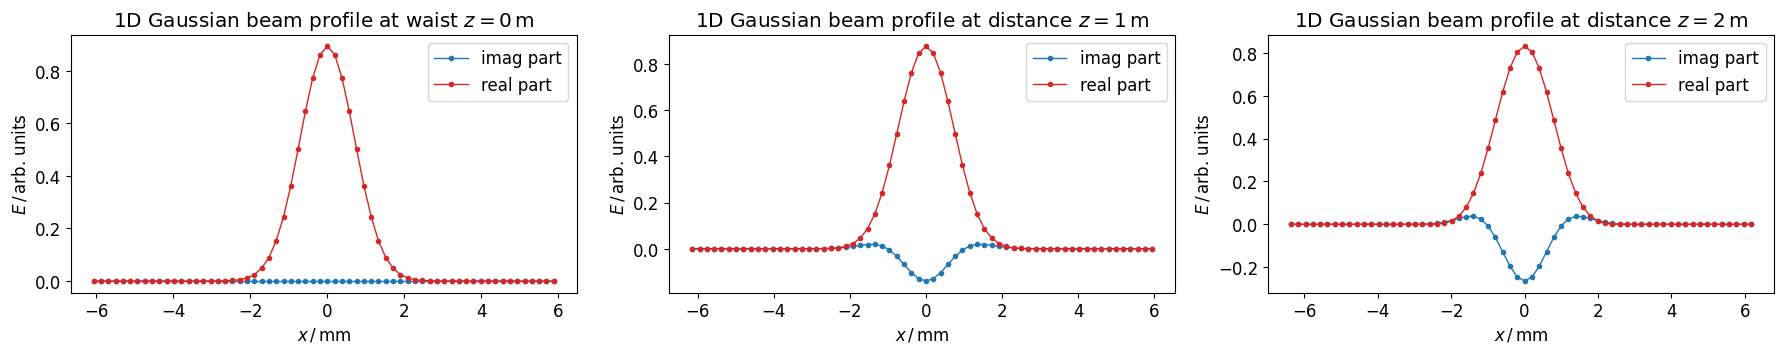

In [44]:
n_cols = 3
n_rows = 1
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv0
ev = E1d0
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at waist $z = 0\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv1
ev = E1d1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at distance $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv2
ev = E1d2
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at distance $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

plt.tight_layout()
plt.show()

### Create Gaussian beams at z = zR, 2 zR, and 5 zR downstream of the waist.

Identify $\Delta{x}$, $\Delta\nu$, and the _space-bandwidth product_, $SW = \Delta{x} \Delta\nu$:

In [45]:
L3 = zR
L4 = 2 * zR
L5 = 5 * zR

In [46]:
Dx3 = np.round(Dx(wvl, w0, L3), 2)
Dx4 = np.round(Dx(wvl, w0, L4), 2)
Dx5 = np.round(Dx(wvl, w0, L5), 2)
Dx3, Dx4, Dx5

(17.17, 27.14, 61.9)

In [47]:
Dnu3 = np.round(Dnu(wvl, w0, L3), 2)
Dnu4 = np.round(Dnu(wvl, w0, L4), 2)
Dnu5 = np.round(Dnu(wvl, w0, L5), 2)
Dnu3, Dnu4, Dnu5

(3.86, 3.86, 3.86)

In [48]:
SW3 = np.round(SW(wvl, w0, L3), 2)
SW4 = np.round(SW(wvl, w0, L4), 2)
SW5 = np.round(SW(wvl, w0, L5), 2)
SW3, SW4, SW5

(66.34, 104.89, 239.18)

In [49]:
Nx3 =  80
Nx4 = 128
Nx5 = 256

In [50]:
dx3 = Dx3 / Nx3
dx4 = Dx4 / Nx4
dx5 = Dx5 / Nx5
dx3, dx4, dx5

(0.214625, 0.21203125, 0.241796875)

In [51]:
xv3 = lct_abscissae(Nx3, dx3)
xv4 = lct_abscissae(Nx4, dx4)
xv5 = lct_abscissae(Nx5, dx5)

In [52]:
E1d3 = efield_gauss_1d(wvl, w0, L3, xv3)
E1d4 = efield_gauss_1d(wvl, w0, L4, xv4)
E1d5 = efield_gauss_1d(wvl, w0, L5, xv5)

Confirm that the fields fall to “zero” at the ends:

In [53]:
np.abs([ E1d3[[0,-1]], E1d4[[0,-1]], E1d5[[0,-1]] ])

array([[7.43836904e-17, 4.58866988e-16],
       [6.04790195e-17, 1.89466209e-16],
       [3.95160934e-17, 7.01139584e-17]])

And plot the fields:

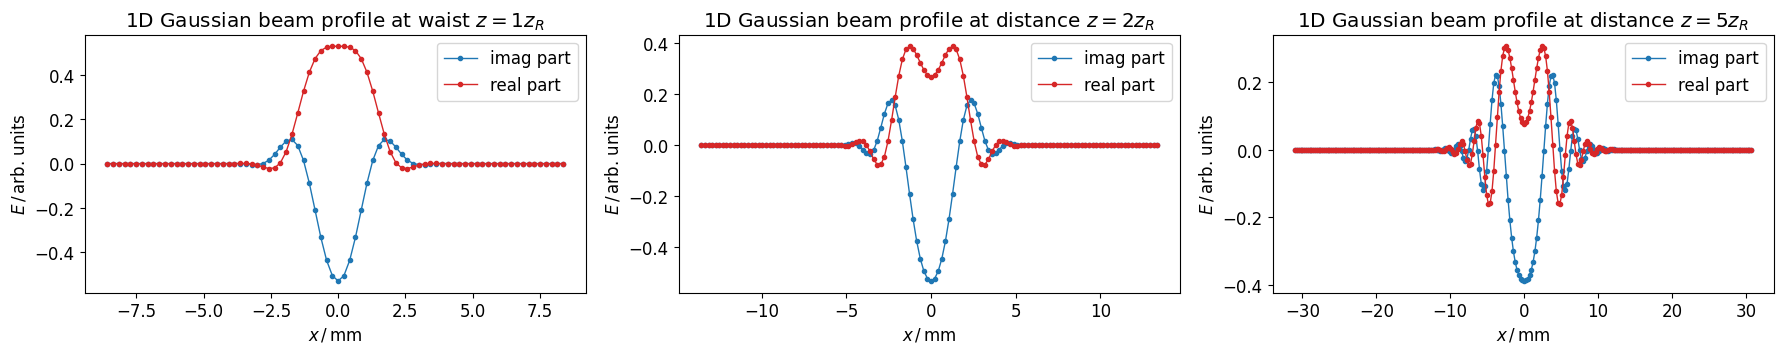

In [54]:
n_cols = 3
n_rows = 1
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv3
ev = E1d3
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at waist $z = 1z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv4
ev = E1d4
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at distance $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv5
ev = E1d5
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam profile at distance $z = 5z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

plt.tight_layout()
plt.show()

### Use LCT to transport beam from waist to $z = 1\,\textrm{m}$ and $2\,\textrm{m}$ downstream of the waist

For this section, we need to perform the following steps
  1. construct the signal: `[ dx, Efld ]`
  1. construct the transfer matrix: `M_drift = [ [ 1, L ], [ 0, 1 ] ]`
  1. define an appropriate length scale: _e.g._ `l_scale = sqrt(π * w0 ** 2)`
  1. apply scaling to both signal and transfer matrix: `du = dx / l_scale`, `L` $\to$ `L / z_Rayleigh`
  1. apply LCT: `apply_lct(M_lct, in_signal)`
  1. apply inverse scaling to the output signal: `dx_f = l_scale * du_f`
  1. plot the output signal: `xv_f = lct_abscissae(Nx_f, dx_f)`

Construct the initial signal and the ray optical transport matrices:

In [55]:
signal_E0 = [dx0, E1d0]
M_dr1 = np.array([ [1., L1], [0., 1.] ])
M_dr2 = np.array([ [1., L2], [0., 1.] ])

Define a scale length appropriate for Gaussian beams:

In [56]:
l_scale = np.sqrt(π * w0 ** 2)
print("Scale length = {0:7.3f} mm".format(l_scale))

Scale length =   1.772 mm


Scale the initial signal and the ray optical transport matrices:

In [57]:
du0 = dx0 / l_scale
signal_E0_scl = [du0, E1d0]
dx0, du0

(0.1896875, 0.10701971162921503)

In [58]:
M_dr1_scl = scale_matrix(M_dr1, wvl, l_scale)
M_dr2_scl = scale_matrix(M_dr2, wvl, l_scale)
print_matrix(M_dr1_scl)
print()
print_matrix(M_dr2_scl)

  1.000000000    0.159154943
  0.000000000    1.000000000

  1.000000000    0.318309886
  0.000000000    1.000000000


Apply the LCT:

In [59]:
t0 = tm.time()
signal_E01_scl = apply_lct(M_dr1_scl, signal_E0_scl)
t1 = tm.time()
print("LCT run-time: {0:5.3f} ms".format((t1 - t0) / si_m))

LCT run-time: 4.836 ms


In [60]:
t0 = tm.time()
signal_E02_scl = apply_lct(M_dr2_scl, signal_E0_scl)
t1 = tm.time()
print("LCT run-time: {0:5.3f} ms".format((t1 - t0) / si_m))

LCT run-time: 4.610 ms


Extract the output sample spacings and ranges:

In [61]:
du01, E1d01 = signal_E01_scl
dx01 = l_scale * du01
Nx01 = E1d01.size
Dx01 = Nx01 * dx01
print("For signal propagated from waist to z = 1 m downstream of the waist:")
print("         number of samples: in =  {0:7d},  out = {1:7d}".format(Nx0, Nx01))
print("    scaled sample spacings: in =  {0:7.4f},  out = {1:7.4f}".format(du0, du01))
print("  physical sample spacings: in =  {0:7.4f},  out = {1:7.4f}".format(dx0, dx01))
print("             signal ranges: in = {0:8.4f}, out = {1:8.4f}".format(Dx0, Dx01))

For signal propagated from waist to z = 1 m downstream of the waist:
         number of samples: in =       64,  out =      75
    scaled sample spacings: in =   0.1070,  out =  0.1826
  physical sample spacings: in =   0.1897,  out =  0.3237
             signal ranges: in =  12.1400, out =  24.2800


In [62]:
du02, E1d02 = signal_E02_scl
dx02 = l_scale * du02
Nx02 = E1d02.size
Dx02 = Nx02 * dx02
print("For signal propagated from waist to z = 2 m downstream of the waist:")
print("         number of samples: in =  {0:7d},  out = {1:7d}".format(Nx0, Nx01))
print("    scaled sample spacings: in =  {0:7.4f},  out = {1:7.4f}".format(du0, du01))
print("  physical sample spacings: in =  {0:7.4f},  out = {1:7.4f}".format(dx0, dx01))
print("             signal ranges: in = {0:8.4f}, out = {1:8.4f}".format(Dx0, Dx01))

For signal propagated from waist to z = 2 m downstream of the waist:
         number of samples: in =       64,  out =      75
    scaled sample spacings: in =   0.1070,  out =  0.1826
  physical sample spacings: in =   0.1897,  out =  0.3237
             signal ranges: in =  12.1400, out =  24.2800


In [63]:
xv01 = lct_abscissae(Nx01, dx01)
xv02 = lct_abscissae(Nx02, dx02)

And plot the fields:

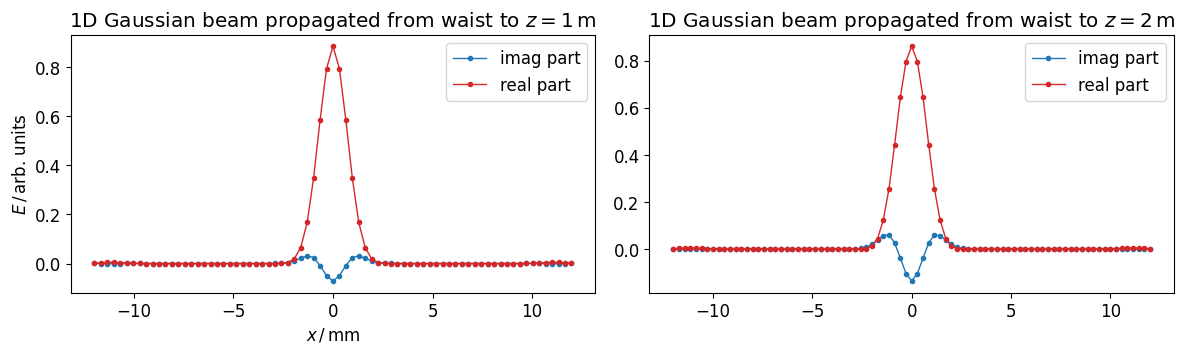

In [64]:
n_cols = 2
n_rows = 1
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv01
ev = E1d01
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv02
ev = E1d02
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam propagated from waist to $z = 2\,$m')
plt.legend()

plt.tight_layout()
plt.show()

Compare the LCT results with the corresponding analytic results:

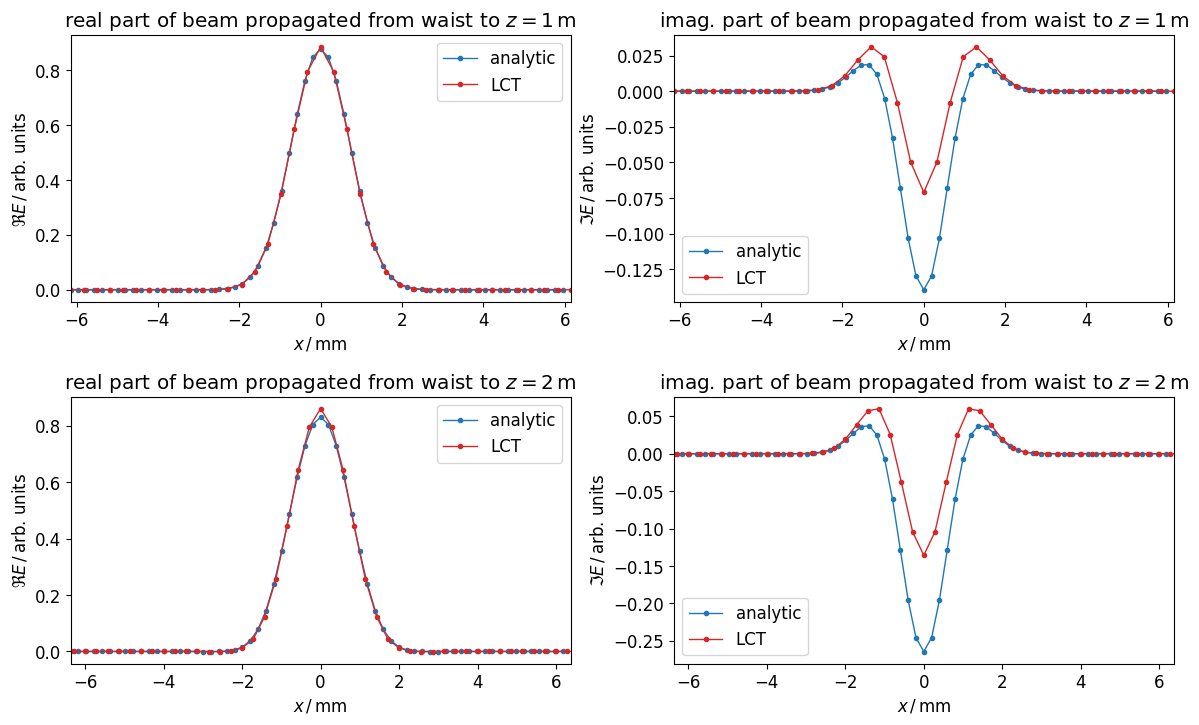

In [65]:
n_cols = 2
n_rows = 2
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv01
ev = E1d01
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1, np.real(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1, np.imag(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.legend()

idx += 1
xv = xv02
ev = E1d02
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2, np.real(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2, np.imag(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.legend()

plt.tight_layout()
plt.show()

Rephase the LCT results and repeat the comparison:

In [68]:
idx0_0 = np.argwhere(xv0 == 0.).flatten()[0]
idx0_1 = np.argwhere(xv1 == 0.).flatten()[0]
idx0_2 = np.argwhere(xv2 == 0.).flatten()[0]
idx0_0, idx0_1, idx0_2

(32, 32, 32)

In [69]:
idx0_01 = np.argwhere(xv01 == 0.).flatten()[0]
idx0_02 = np.argwhere(xv02 == 0.).flatten()[0]
idx0_01, idx0_02

(37, 42)

In [70]:
xv0[idx0_0], xv1[idx0_1], xv2[idx0_2], xv01[idx0_01], xv02[idx0_02]

(0.0, 0.0, 0.0, 0.0, 0.0)

In [71]:
E1d0[idx0_0], E1d1[idx0_1], E1d2[idx0_2], E1d01[idx0_01], E1d02[idx0_02]

((0.8932438417380023+0j),
 (0.8766418272908447-0.13952188013444955j),
 (0.8308727890046952-0.2644750229012934j),
 (0.8846372081768776-0.07111348379795718j),
 (0.8606280792146002-0.13580061350416567j))

In [74]:
phi0_0 = np.angle(E1d0[idx0_0])
phi0_1 = np.angle(E1d1[idx0_1])
phi0_2 = np.angle(E1d2[idx0_2])
phi0_0, phi0_1, phi0_2

(0.0, -0.15783119028815887, -0.30816907111598507)

In [75]:
phi0_01 = np.angle(E1d01[idx0_01])
phi0_02 = np.angle(E1d02[idx0_02])
phi0_01, phi0_02 

(-0.08021468414466341, -0.15650207701831692)

In [117]:
2 * np.asarray([phi0_01, phi0_02])

array([-0.16042937, -0.31300415])

In [118]:
100 * (2 * np.asarray([phi0_01, phi0_02]) - np.asarray([phi0_1, phi0_2])) / np.asarray([phi0_1, phi0_2])

array([1.64617526, 1.56897086])

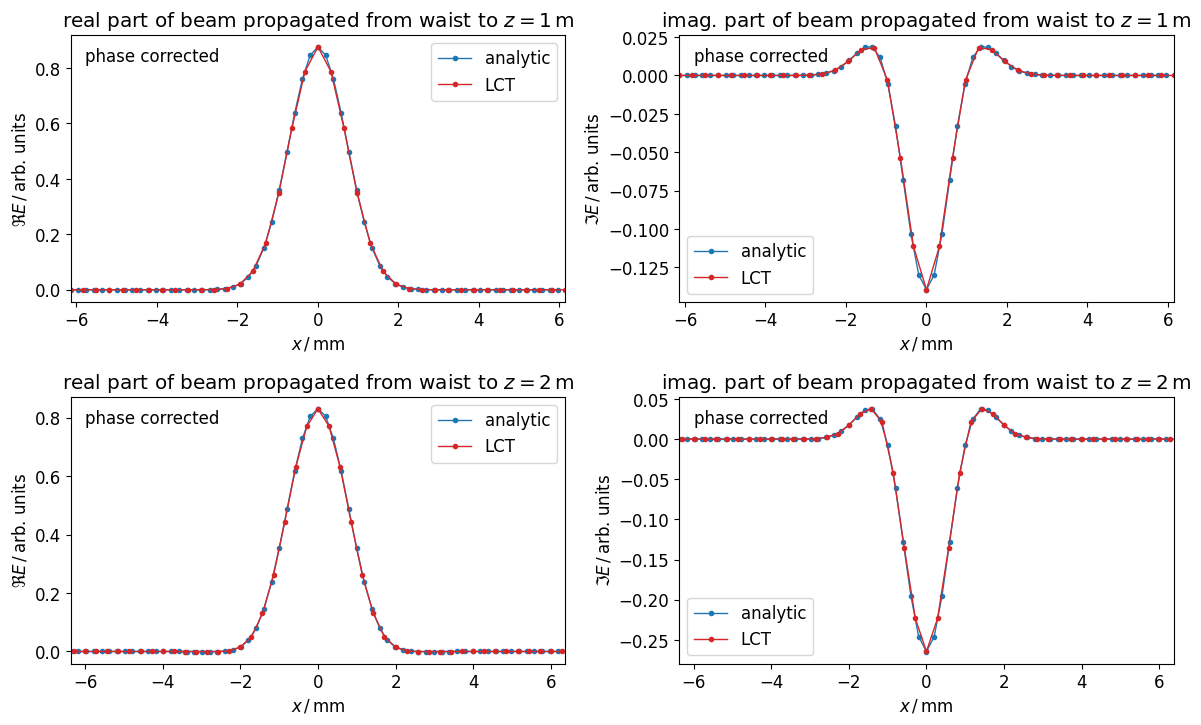

In [82]:
n_cols = 2
n_rows = 2
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

label = 'phase corrected'

idx += 1
ev = E1d01 * np.exp(1j * (phi0_1 - phi0_01))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1,  np.real(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv01, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1,  np.imag(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv01, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d02 * np.exp(1j * (phi0_2 - phi0_02))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2,  np.real(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv02, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2,  np.imag(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv02, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

plt.tight_layout()
plt.show()

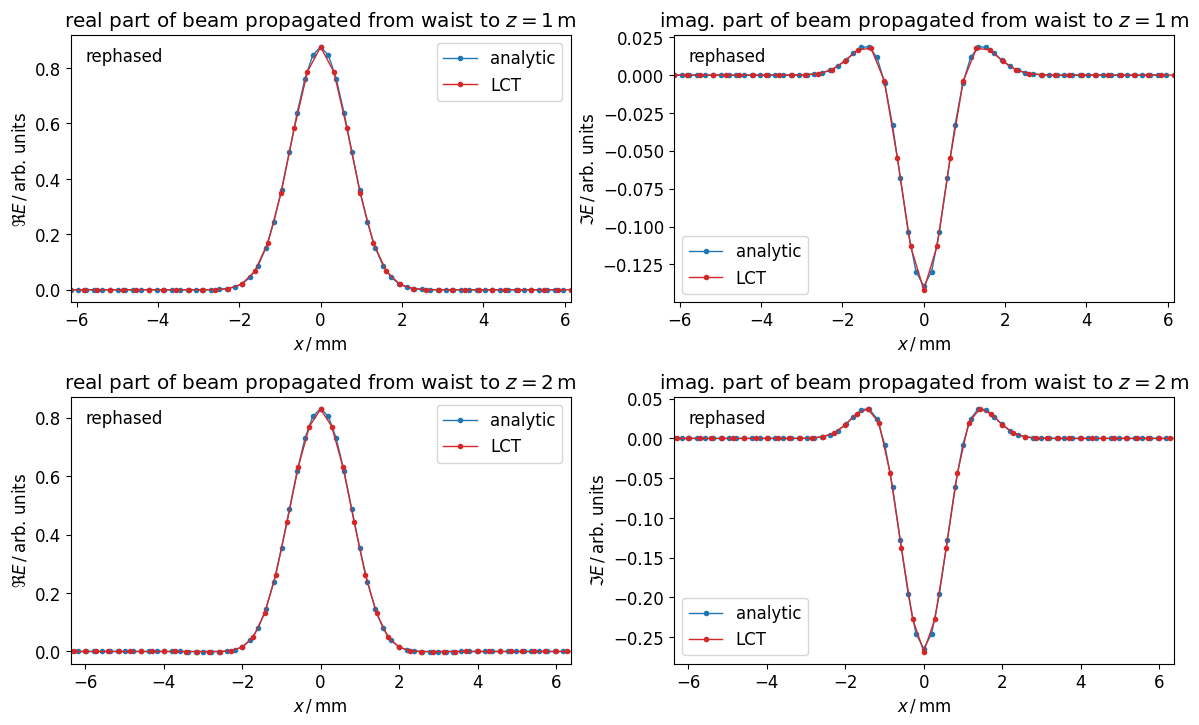

In [83]:
n_cols = 2
n_rows = 2
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

label = 'rephased'

idx += 1
ev = E1d01 * np.exp(1j * (phi0_01 - phi0_0))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1,  np.real(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv01, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv1,  np.imag(E1d1), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv01, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 1\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx1/2, +Dx1/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d02 * np.exp(1j * (phi0_02 - phi0_0))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2,  np.real(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv02, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv2,  np.imag(E1d2), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv02, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2\,$m')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx2/2, +Dx2/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

plt.tight_layout()
plt.show()

### Use LCT to transport beam from waist to $z = z_R$, $2z_R$, and $3z_R$ downstream of the waist

Construct the ray optical transport matrices:

In [86]:
M_dr3 = np.array([ [1., L3], [0., 1.] ])
M_dr4 = np.array([ [1., L4], [0., 1.] ])
M_dr5 = np.array([ [1., L5], [0., 1.] ])

In [88]:
M_dr3_scl = scale_matrix(M_dr3, wvl, l_scale)
M_dr4_scl = scale_matrix(M_dr4, wvl, l_scale)
M_dr5_scl = scale_matrix(M_dr5, wvl, l_scale)
print_matrix(M_dr3_scl)
print()
print_matrix(M_dr4_scl)
print()
print_matrix(M_dr5_scl)

  1.000000000    1.000000000
  0.000000000    1.000000000

  1.000000000    2.000000000
  0.000000000    1.000000000

  1.000000000    5.000000000
  0.000000000    1.000000000


Apply the LCT:

In [89]:
t0 = tm.time()
signal_E03_scl = apply_lct(M_dr3_scl, signal_E0_scl)
t1 = tm.time()
print("LCT run-time: {0:5.3f} ms".format((t1 - t0) / si_m))

LCT run-time: 4.019 ms


In [90]:
t0 = tm.time()
signal_E04_scl = apply_lct(M_dr4_scl, signal_E0_scl)
t1 = tm.time()
print("LCT run-time: {0:5.3f} ms".format((t1 - t0) / si_m))

LCT run-time: 2.917 ms


In [91]:
t0 = tm.time()
signal_E05_scl = apply_lct(M_dr5_scl, signal_E0_scl)
t1 = tm.time()
print("LCT run-time: {0:5.3f} ms".format((t1 - t0) / si_m))

LCT run-time: 2.536 ms


Extract the output sample spacings and ranges:

In [98]:
du03, E1d03 = signal_E03_scl
dx03 = l_scale * du03
Nx03 = E1d03.size
Dx03 = Nx03 * dx03
print("For signal propagated from waist to z = zR downstream of the waist:")
print("         number of samples: in =  {0:7d},  out =  {1:7d}".format(Nx0, Nx03))
print("    scaled sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(du0, du03))
print("  physical sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(dx0, dx03))
print("             signal ranges: in = {0:8.4f},  out = {1:8.4f}".format(Dx0, Dx03))

For signal propagated from waist to z = zR downstream of the waist:
         number of samples: in =       64,  out =      384
    scaled sample spacings: in =   0.1070,  out =   0.0487
  physical sample spacings: in =   0.1897,  out =   0.0863
             signal ranges: in =  12.1400,  out =  33.1239


In [99]:
du04, E1d04 = signal_E04_scl
dx04 = l_scale * du04
Nx04 = E1d04.size
Dx04 = Nx04 * dx04
print("For signal propagated from waist to z = 2zR downstream of the waist:")
print("         number of samples: in =  {0:7d},  out =  {1:7d}".format(Nx0, Nx04))
print("    scaled sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(du0, du04))
print("  physical sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(dx0, dx04))
print("             signal ranges: in = {0:8.4f},  out = {1:8.4f}".format(Dx0, Dx04))

For signal propagated from waist to z = 2zR downstream of the waist:
         number of samples: in =       64,  out =      385
    scaled sample spacings: in =   0.1070,  out =   0.0971
  physical sample spacings: in =   0.1897,  out =   0.1721
             signal ranges: in =  12.1400,  out =  66.2478


In [100]:
du05, E1d05 = signal_E05_scl
dx05 = l_scale * du05
Nx05 = E1d05.size
Dx05 = Nx05 * dx05
print("For signal propagated from waist to z = 5zR downstream of the waist:")
print("         number of samples: in =  {0:7d},  out =  {1:7d}".format(Nx0, Nx05))
print("    scaled sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(du0, du05))
print("  physical sample spacings: in =  {0:7.4f},  out =  {1:7.4f}".format(dx0, dx05))
print("             signal ranges: in = {0:8.4f},  out = {1:8.4f}".format(Dx0, Dx05))

For signal propagated from waist to z = 5zR downstream of the waist:
         number of samples: in =       64,  out =      538
    scaled sample spacings: in =   0.1070,  out =   0.1737
  physical sample spacings: in =   0.1897,  out =   0.3078
             signal ranges: in =  12.1400,  out = 165.6194


In [102]:
xv03 = lct_abscissae(Nx03, dx03)
xv04 = lct_abscissae(Nx04, dx04)
xv05 = lct_abscissae(Nx05, dx05)

And plot the fields:

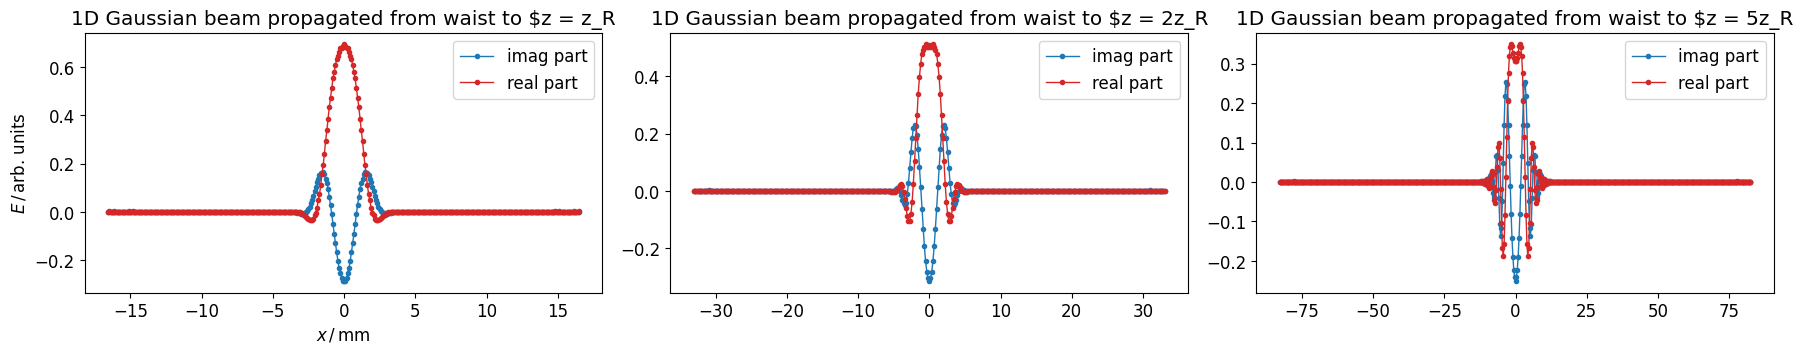

In [103]:
n_cols = 3
n_rows = 1
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv03
ev = E1d03
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam propagated from waist to $z = z_R')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$E\,/\,$arb. units')
plt.legend()

idx += 1
xv = xv04
ev = E1d04
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam propagated from waist to $z = 2z_R')
plt.legend()

idx += 1
xv = xv05
ev = E1d05
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv, np.imag(ev), '.-C0', lw = 1, label = 'imag part')
plt.plot(xv, np.real(ev), '.-C3', lw = 1, label = 'real part')
plt.title(r'1D Gaussian beam propagated from waist to $z = 5z_R')
plt.legend()

plt.tight_layout()
plt.show()

Compare the LCT results with the corresponding analytic results:

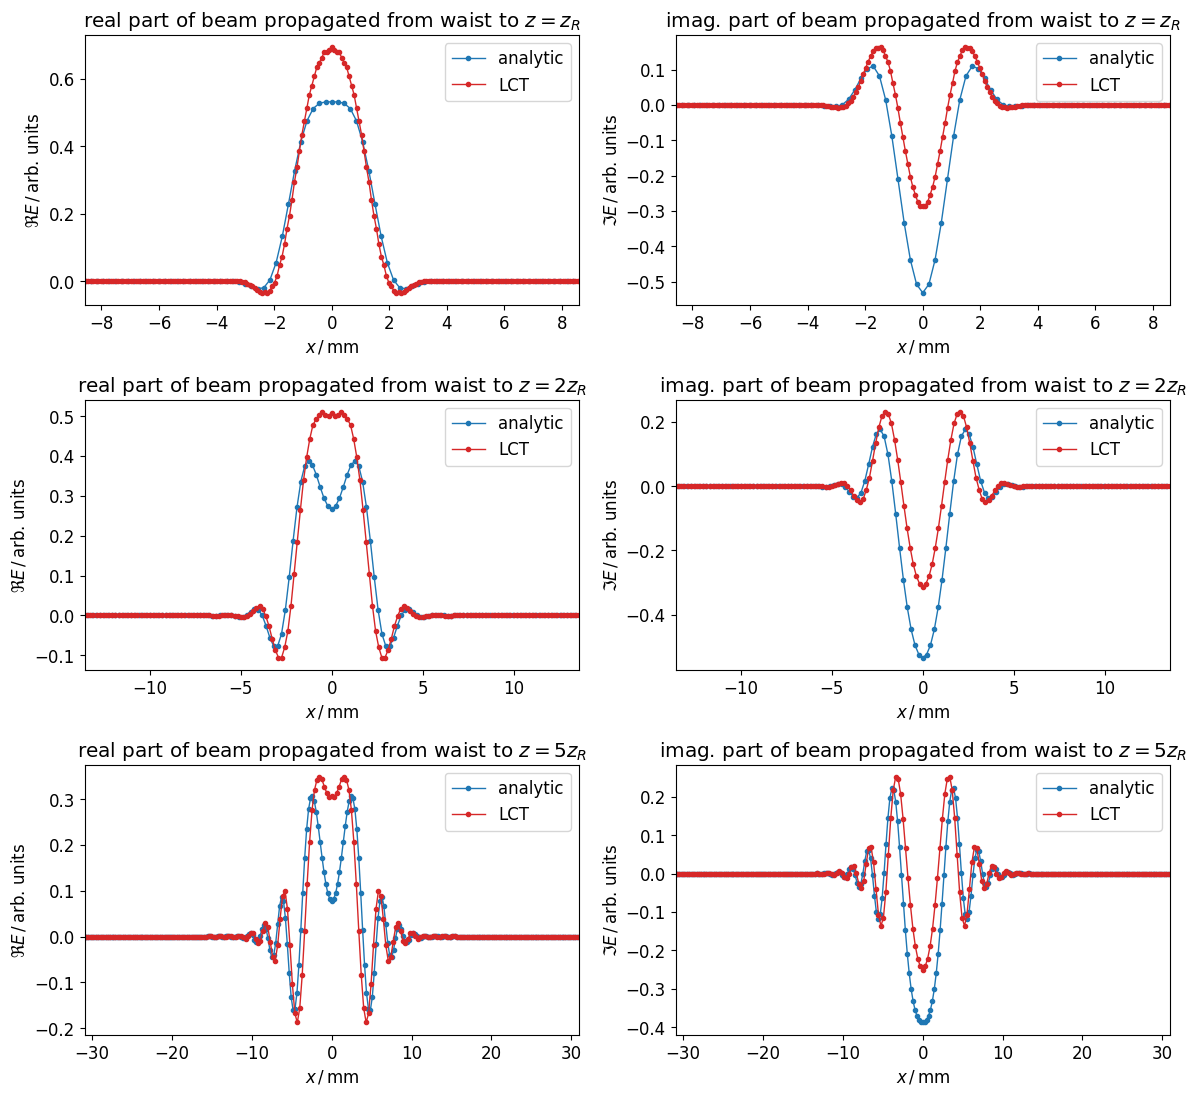

In [104]:
n_cols = 2
n_rows = 3
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
xv = xv03
ev = E1d03
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3, np.real(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3, np.imag(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.legend()

idx += 1
xv = xv04
ev = E1d04
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4, np.real(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4, np.imag(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.legend()

idx += 1
xv = xv05
ev = E1d05
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5, np.real(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 5z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5, np.imag(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv,  np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 5z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.legend()

plt.tight_layout()
plt.show()

Rephase the LCT results and repeat the comparison:

In [105]:
idx0_3 = np.argwhere(xv3 == 0.).flatten()[0]
idx0_4 = np.argwhere(xv4 == 0.).flatten()[0]
idx0_5 = np.argwhere(xv5 == 0.).flatten()[0]
idx0_3, idx0_4, idx0_5

(40, 64, 128)

In [106]:
idx0_03 = np.argwhere(xv03 == 0.).flatten()[0]
idx0_04 = np.argwhere(xv04 == 0.).flatten()[0]
idx0_05 = np.argwhere(xv05 == 0.).flatten()[0]
idx0_03, idx0_04, idx0_05

(192, 192, 269)

In [107]:
xv3[idx0_3], xv4[idx0_4], xv5[idx0_5], xv03[idx0_03], xv04[idx0_04], xv05[idx0_05]

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [108]:
E1d3[idx0_3], E1d4[idx0_4], E1d5[idx0_5], E1d03[idx0_03], E1d04[idx0_04], E1d05[idx0_05]

((0.5311259660135984-0.5311259660135983j),
 (0.26714221801525656-0.534284436030513j),
 (0.07757825735026071-0.38789128675130363j),
 (0.6930324592960213-0.2852433245172417j),
 (0.5082403498729413-0.31284873433363813j),
 (0.30607701060128245-0.25048085664282566j))

In [109]:
phi0_3 = np.angle(E1d3[idx0_3])
phi0_4 = np.angle(E1d4[idx0_4])
phi0_5 = np.angle(E1d5[idx0_5])
phi0_3, phi0_4, phi0_5

(-0.7853981633974482, -1.1071487177940904, -1.373400766945016)

In [110]:
phi0_03 = np.angle(E1d03[idx0_03])
phi0_04 = np.angle(E1d04[idx0_04])
phi0_05 = np.angle(E1d05[idx0_05])
phi0_03, phi0_04, phi0_05

(-0.3904553047255958, -0.5517769098372661, -0.6858355968537474)

In [114]:
2 * np.asarray([phi0_03, phi0_04, phi0_05])

array([-0.78091061, -1.10355382, -1.37167119])

In [116]:
100 * (2 * np.asarray([phi0_03, phi0_04, phi0_05]) - np.asarray([phi0_3, phi0_4, phi0_5])) / np.asarray([phi0_3, phi0_4, phi0_5])

array([-0.57137311, -0.32469876, -0.12593362])

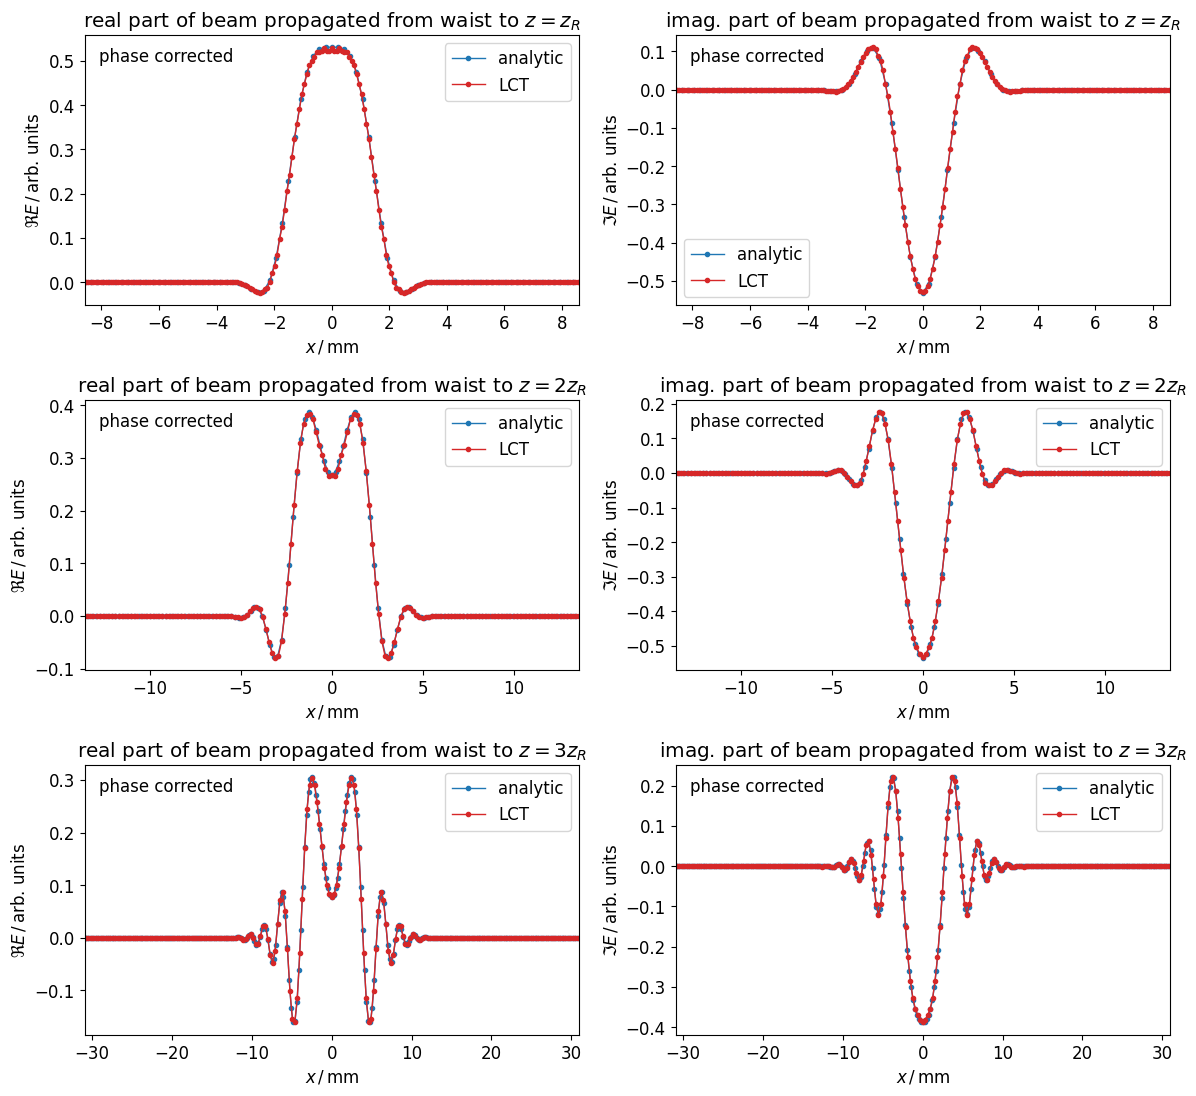

In [111]:
n_cols = 2
n_rows = 3
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

label = 'phase corrected'

idx += 1
ev = E1d03 * np.exp(1j * (phi0_3 - phi0_03))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3,  np.real(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv03, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3,  np.imag(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv03, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d04 * np.exp(1j * (phi0_4 - phi0_04))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4,  np.real(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv04, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4,  np.imag(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv04, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d05 * np.exp(1j * (phi0_5 - phi0_05))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5,  np.real(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv05, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 3z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5,  np.imag(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv05, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 3z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

plt.tight_layout()
plt.show()

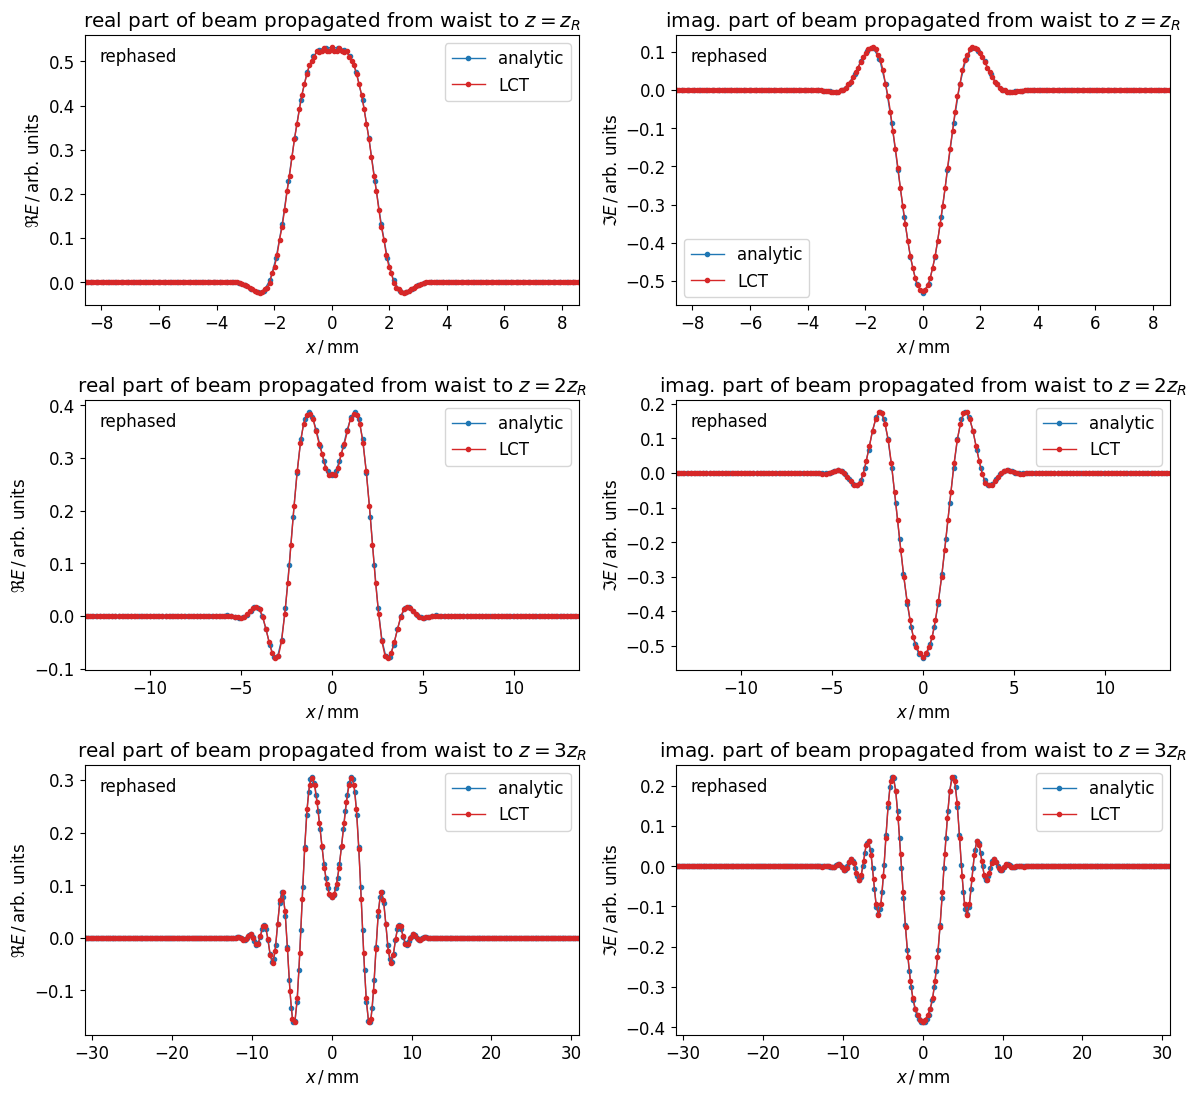

In [112]:
n_cols = 2
n_rows = 3
sz_h = 6
sz_v = sz_h / gr
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

label = 'rephased'

idx += 1
ev = E1d03 * np.exp(1j * (phi0_03 - phi0_0))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3,  np.real(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv03, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv3,  np.imag(E1d3), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv03, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx3/2, +Dx3/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d04 * np.exp(1j * (phi0_04 - phi0_0))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4,  np.real(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv04, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv4,  np.imag(E1d4), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv04, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 2z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx4/2, +Dx4/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ev = E1d05 * np.exp(1j * (phi0_05 - phi0_0))
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5,  np.real(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv05, np.real(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'real part of beam propagated from waist to $z = 3z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Re{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(xv5,  np.imag(E1d5), '.-C0', lw = 1, label = 'analytic')
plt.plot(xv05, np.imag(ev),   '.-C3', lw = 1, label = 'LCT')
plt.title(r'imag. part of beam propagated from waist to $z = 3z_R$')
plt.xlabel(r'$x\,/\,$mm')
plt.ylabel(r'$\Im{E}\,/\,$arb. units')
plt.xlim(-Dx5/2, +Dx5/2)
plt.text(0.03, 0.90, label, transform = ax.transAxes)
plt.legend()

plt.tight_layout()
plt.show()

### Use LCT to transport beam from z = 1 m to z = 2m downstream of the waist.

---
## Test the Gaussian beam transport in 2D

Create Gaussian beam at beam waist. <br>
Create Gaussian beam at z = 1 m and 2m downstream of the waist. <br>
Use LCT to transport beam from waist to z = 1 m and 2m downstream of the waist. <br>
Use LCT to transport beam from z = 1 m to z = 2m downstream of the waist.

---
### Define functions for computing the 2D LCT

In [ ]:
mx = rotation_22(360 / 3 * degree)
my = rotation_22(360 / 3 * degree)
mx, my

In [ ]:
mm = np.eye(4)
mm[0:2,0:2] = mx
mm[2:4,2:4] = my
mm

In [ ]:
permute_22_nn(mm)

In [ ]:
np.all(permute_nn_22(_) == mm)

In [ ]:
ns = 32
dX = 2 * np.pi / ns
xv = lct_abscissae(ns, dX, ishift = False)

In [ ]:
ns = 48
dY = 2 * np.pi / ns
yv = lct_abscissae(ns, dY, ishift = False)

In [ ]:
sig_xy = [ [ (1 + np.cos(x)) * (1 + np.cos(y)) for x in xv ] for y in yv ]
in_signal_2d = ( dX, dY, sig_xy )

In [ ]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 7
sz_v = sz_h / 1.2
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
shading = 'gouraud'
# shading = 'nearest'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.set_aspect(1.0)
pcm = ax.pcolormesh(xv, yv, np.real(sig_xy), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title('input signal (real part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.set_aspect(1.0)
pcm = ax.pcolormesh(xv, yv, np.imag(sig_xy), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title('input signal (imaginary part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

plt.tight_layout()
plt.show()

In [ ]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 7
sz_v = sz_h / 1.2
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
# shading = 'gouraud'
shading = 'nearest'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(1.0)
pcm = ax.pcolormesh(xv, yv, np.real(sig_xy), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title('input signal (real part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(1.0)
pcm = ax.pcolormesh(xv, yv, np.imag(sig_xy), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title('input signal (imaginary part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

plt.tight_layout()
plt.show()

In [ ]:
in_signal_2d[:2], np.shape(in_signal_2d[-1])

In [ ]:
signal_2d_1 = apply_lct_2d_sep(mx, my, in_signal_2d)
signal_2d_2 = apply_lct_2d_sep(mx, my, signal_2d_1)
signal_2d_3 = apply_lct_2d_sep(mx, my, signal_2d_2)

In [ ]:
np.shape(signal_2d_1[-1]), np.shape(signal_2d_2[-1]), np.shape(signal_2d_3[-1])

In [ ]:
hx, hy = signal_2d_3[:2]
ny, nx = np.shape(signal_2d_3[-1])
nx * hx, ny * hy

In [ ]:
idx = 0
n_rows = 3
n_cols = 2
sz_h = 7
sz_v = sz_h / 1.2
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
# shading = 'gouraud'
shading = 'nearest'

hx, hy, sig_arr = signal_2d_1
ny, nx = np.shape(sig_arr)
local_xv = lct_abscissae(nx, hx)
local_yv = lct_abscissae(ny, hy)

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
pcm = ax.pcolormesh(local_xv, local_yv, np.real(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]$(input signal), real part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
pcm = ax.pcolormesh(local_xv, local_yv, np.imag(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]$(input signal), imaginary part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')


hx, hy, sig_arr = signal_2d_2
ny, nx = np.shape(sig_arr)
local_xv = lct_abscissae(nx, hx)
local_yv = lct_abscissae(ny, hy)

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
pcm = ax.pcolormesh(local_xv, local_yv, np.real(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]^2$(input signal), real part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
pcm = ax.pcolormesh(local_xv, local_yv, np.imag(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]^2$(input signal), imaginary part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')


hx, hy, sig_arr = signal_2d_3
ny, nx = np.shape(sig_arr)
local_xv = lct_abscissae(nx, hx)
local_yv = lct_abscissae(ny, hy)

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(1.0)
pcm = ax.pcolormesh(local_xv, local_yv, np.real(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]^3$(input signal), real part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(1.0)
pcm = ax.pcolormesh(local_xv, local_yv, np.imag(sig_arr), cmap = plt.cm.viridis, shading = shading)
plt.colorbar(pcm)
plt.title(r'$R[120°]^3$(input signal), imaginary part')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.tight_layout()
plt.show()

In [ ]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 7
sz_v = sz_h / 1
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
# shading = 'gouraud'
shading = 'nearest'

sig_arr = signal_2d_1[-1]

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.pcolormesh(xv, yv, np.real(signal_2d_1[-1]), cmap = plt.cm.viridis, shading = shading)
# plt.colorbar()
# ax.set_aspect(1.0)
plt.title('input signal (real part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.colorbar()
ax.pcolormesh(xv, yv, np.imag(signal_2d_1[-1]), cmap = plt.cm.viridis, shading = shading)
# ax.set_aspect(1.0)
plt.title('input signal (imaginary part)')
plt.xlabel(r'$x \,/\, \mathrm{m}$')
plt.ylabel(r'$y \,/\, \mathrm{m}$')

plt.tight_layout()
plt.show()

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, in_signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
#  5

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
# 10

In [ ]:
np.shape(signal_2d[-1])

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
# 15

In [ ]:
np.shape(signal_2d[-1])

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
# 20

In [ ]:
np.shape(signal_2d[-1])

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
# 25

In [ ]:
np.shape(signal_2d[-1])

In [ ]:
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
signal_2d = apply_lct_2d_sep(mx, my, signal_2d)
# 30

In [ ]:
np.shape(signal_2d[-1])

---
## Test the Pieces

In [ ]:
# create initial Gaussian beam
sigmar = 0.15e-3        # initial RMS beam size at center of cavity [m]
propLen=15              # propagation of initial Gaussian [m] (it will back-propagated by propLen to obtain the Gaussian mode at the waist)
pulseE = .001           # total energy of pulse [eV]
mx = 1                  # horizontal mode number (0 for Gaussian)
my = 1                  # vertical mode number (0 for Gaussian)
poltype = 1             # polarization of mode (0=linear horiz, 1=linear vert, 2=linear 45°, 3=linear 135°, 4=circular right, 5=circular left, 6=total)
wavefrontEnergy = 1.55  # wavefront Energy [eV]; 1.55 eV <==> 800 nm wavelength
sampFact = 10           # determines grid size of initial wavefront
wfr0=createGsnSrcSRW(sigmar,propLen,pulseE,poltype,wavefrontEnergy,sampFact,mx,my) # create Gaussian wavefront in SRW
(nx0,ny0)=(wfr0.mesh.nx,wfr0.mesh.ny)
print("Initial wavefront calculated on a grid of %d x %d points" %(nx0,ny0))

In [ ]:
#Resize initial Elec Field?
srwl.ResizeElecField(wfr0, 'c', [0, 1.5, 1, 1.5, 1])
(nx0, ny0) = (wfr0.mesh.nx, wfr0.mesh.ny)
print("New grid size of %d x %d points" %(nx0, ny0))

In [ ]:
?srwl.ResizeElecField

In [ ]:
# create an ABCD rotation matrix
theta = np.pi/4
Aval =  np.cos(theta)
Bval =  np.sin(theta)
Cval = -np.sin(theta)
Dval =  np.cos(theta)

# create a deep copy of the initial Gaussian wavefront
# (because we wish to keep a copy of the original)
wfr1 = deepcopy(wfr0)

#wfrsizef=(wfr1.mesh.nx*wfr1.mesh.ny)

ABCD_BL = createABCDbeamline(Aval,Bval,Cval,Dval) 

start_time = time.time()
srwl.PropagElecField(wfr1, ABCD_BL) #theta = pi/4  
wfr2 = deepcopy(wfr1)
srwl.PropagElecField(wfr2, ABCD_BL) #theta =  pi/2
srwl.PropagElecField(wfr2, ABCD_BL) #theta = 3pi/4
srwl.PropagElecField(wfr2, ABCD_BL) #theta =  pi
srwl.PropagElecField(wfr2, ABCD_BL) #theta = 5pi/4
srwl.PropagElecField(wfr2, ABCD_BL) #theta = 3pi/2
srwl.PropagElecField(wfr2, ABCD_BL) #theta = 7pi/4
srwl.PropagElecField(wfr2, ABCD_BL) #theta = 2pi
print("Propagation time: %s seconds" %(round((time.time() - start_time),5)))

In [ ]:
print(np.shape(wfr2.arEx), np.min(wfr2.arEx), np.max(wfr2.arEx))
print(np.shape(wfr2.arEy), np.min(wfr2.arEy), np.max(wfr2.arEy))

In [ ]:
17006112 / 2916 ** 2

In [ ]:
srwl.CalcIntFromElecField?

https://github.com/ochubar/SRW/blob/master/env/work/srw_python/srwlib.py#L10708

In [ ]:
np.reshape?

In [ ]:
def elec_v_xy(wfr, i_re_im):
    """
    Given the SRW wavefront object wfr, return 
    """
    i_pol  = 6            # total
    i_type = 5 + i_re_im  # i_re_im = 0 (real) or 1 (imag)
    i_dep  = 3            # x&y
    
    xvals = np.linspace(wfr.mesh.xStart, wfr.mesh.xFin, wfr.mesh.nx)
    yvals = np.linspace(wfr.mesh.yStart, wfr.mesh.yFin, wfr.mesh.ny)

    arr = array('f', [0] * wfr.mesh.nx * wfr.mesh.ny)
    srwl.CalcIntFromElecField(arr, wfr, i_pol, i_type, i_dep, wfr.mesh.eStart, 0, 0)
    arr = np.array(arr).reshape((wfr.mesh.nx, wfr.mesh.ny), order = 'C')

    return (xvals, yvals, arr)

In [ ]:
xv, yv, e2d =  elec_v_xy(wfr0, 0)

In [ ]:
e2d.shape

In [ ]:
# plot initial wavefront
wfrplot = wfr0

arIinit = array('f', [0] * wfrplot.mesh.nx * wfrplot.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot, 6, 0, 3, wfrplot.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D = np.array(arIinit).reshape((wfrplot.mesh.nx, wfrplot.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot.mesh.xStart,wfrplot.mesh.xFin,wfrplot.mesh.nx)
yvals0=np.linspace(wfrplot.mesh.yStart,wfrplot.mesh.yFin,wfrplot.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

#By setting wfr0a.unitElFldAng=1, default units should now be in mrad(?)
plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIinit2D, cmap=plt.cm.viridis)
plt.colorbar()
zoomfactor=10
xmax = wfrplot.mesh.xFin*1e6
ymax = wfrplot.mesh.yFin*1e6
ax.set_ylim(-ymax/zoomfactor/1.8, ymax/zoomfactor/1.8)
ax.set_xlim(-xmax/zoomfactor/1.8, xmax/zoomfactor/1.8)
ax.set_aspect(1.0)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Initial Intensity')
# ax.xtick.labelsize
plt.savefig('LCT-0.png')
plt.show()

In [ ]:
# Plot wavefront at pi/4
wfrplot2 = wfr1

arIinit = array('f', [0]*wfrplot2.mesh.nx*wfrplot2.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot2, 6, 0, 3, wfrplot2.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D1 = np.array(arIinit).reshape((wfrplot2.mesh.nx, wfrplot2.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIinit2D1, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_aspect(1.0)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Intensity after pi/4 rotation')
plt.savefig('LCT-1.png')
plt.show()

In [ ]:
# Plot final wavefront
wfrplot2 = wfr2

arIfinal = array('f', [0]*wfrplot2.mesh.nx*wfrplot2.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIfinal, wfrplot2, 6, 0, 3, wfrplot2.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIfinal2D = np.array(arIfinal).reshape((wfrplot2.mesh.nx, wfrplot2.mesh.ny), order='C')
wfrsizei=np.size(arIfinal)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIfinal2D, cmap=plt.cm.viridis)  # setting wfr0a.unitElFldAng=1, default units should now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor/1.8, ymax/zoomfactor/1.8)
ax.set_xlim(-xmax/zoomfactor/1.8, xmax/zoomfactor/1.8)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_aspect(1.0)
ax.set_title('Final Intensity after 2pi rotation')
plt.savefig('LCT-8.png')
plt.show()

In [ ]:
arIDif = arIfinal2D - arIinit2D
difMax = np.max(arIDif)
print('%.10f' % difMax)

In [ ]:
# Plot difference in intensity
wfrplot2 = wfr2

norm = np.max(np.abs(arIinit2D))

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIDif/norm, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor/1.8, ymax/zoomfactor/1.8)
ax.set_xlim(-xmax/zoomfactor/1.8, xmax/zoomfactor/1.8)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_aspect(1.0)
ax.set_title('Intensity difference')
plt.savefig('LCT-dif.png')
plt.show()

In [ ]:
# Plot final wavefront
wfrplot2 = wfr2

arIfinal = array('f', [0]*wfrplot2.mesh.nx*wfrplot2.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIfinal, wfrplot2, 6, 0, 3, wfrplot2.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIfinal2D = np.array(arIfinal).reshape((wfrplot2.mesh.nx, wfrplot2.mesh.ny), order='C')
wfrsizei=np.size(arIfinal)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIfinal2D, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Final Intensity after 2pi rotation',**hfontLarge)
plt.show()

In [ ]:
arIDif = arIfinal2D - arIinit2D
difMax = np.max(arIDif)
print('%.10f' % difMax)

In [ ]:
# Plot difference in intensity
wfrplot2 = wfr2

norm = np.max(np.abs(arIinit2D))

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIDif/norm, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity difference',**hfontLarge)
plt.show()